The goal of this convolutional neural network is to be able to return slope of linear lines.

This is because the current convolutional network essentially "draws" what a normal tau graph might look like, using the training sets to refine this drawing, instead of actually analyzing the data. This is shown when inputting linear functions or the heavyside function as flux and getting the exact same result. We'll be trying to get different results here with slope.

In [2]:
import torch
import torch.distributions as tdist
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline
from numpy import log

import numpy as np
import imageio

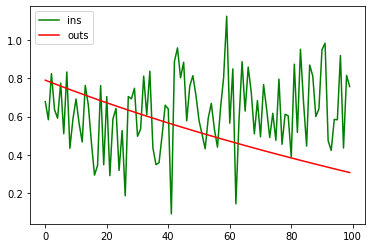

In [3]:
def createTrainer(num):
    start = torch.rand((num))
    lines = torch.zeros(num,1,100)
    outputs = torch.zeros(num,1,100)
    slopes = torch.rand((num))
    slopes = slopes
    for i in range(num):
        lines[i,0] = torch.linspace(start[i], start[i] + slopes[i], 100)
        outputs[i,0] = -log(lines[i,0])
        n = tdist.Normal(torch.tensor(0.0),torch.tensor(0.2))
        lines[i,0] += n.sample((100,))
    return lines, outputs

ins, outs = createTrainer(100)

plt.figure()
plt.plot(ins[1,0], "g", label="ins")
plt.plot(outs[1,0], "r", label="outs")
plt.legend()
plt.show()

Epoch =  0
Training Loss =  tensor(0.6196, grad_fn=<MseLossBackward>)
Epoch =  1
Training Loss =  tensor(0.3307, grad_fn=<MseLossBackward>)
Epoch =  2
Training Loss =  tensor(0.5482, grad_fn=<MseLossBackward>)
Epoch =  3
Training Loss =  tensor(0.4265, grad_fn=<MseLossBackward>)
Epoch =  4
Training Loss =  tensor(0.3874, grad_fn=<MseLossBackward>)
Epoch =  5
Training Loss =  tensor(0.4285, grad_fn=<MseLossBackward>)
Epoch =  6
Training Loss =  tensor(0.3740, grad_fn=<MseLossBackward>)
Epoch =  7
Training Loss =  tensor(0.2572, grad_fn=<MseLossBackward>)
Epoch =  8
Training Loss =  tensor(0.4617, grad_fn=<MseLossBackward>)
Epoch =  9
Training Loss =  tensor(0.5321, grad_fn=<MseLossBackward>)
Epoch =  10
Training Loss =  tensor(0.3244, grad_fn=<MseLossBackward>)
Epoch =  11
Training Loss =  tensor(0.4249, grad_fn=<MseLossBackward>)
Epoch =  12
Training Loss =  tensor(0.3799, grad_fn=<MseLossBackward>)
Epoch =  13
Training Loss =  tensor(0.3671, grad_fn=<MseLossBackward>)
Epoch =  14
Trai

Training Loss =  tensor(0.2526, grad_fn=<MseLossBackward>)
Epoch =  116
Training Loss =  tensor(0.4291, grad_fn=<MseLossBackward>)
Epoch =  117
Training Loss =  tensor(0.4261, grad_fn=<MseLossBackward>)
Epoch =  118
Training Loss =  tensor(0.2742, grad_fn=<MseLossBackward>)
Epoch =  119
Training Loss =  tensor(0.2799, grad_fn=<MseLossBackward>)
Epoch =  120
Training Loss =  tensor(0.3014, grad_fn=<MseLossBackward>)
Epoch =  121
Training Loss =  tensor(0.4377, grad_fn=<MseLossBackward>)
Epoch =  122
Training Loss =  tensor(0.3421, grad_fn=<MseLossBackward>)
Epoch =  123
Training Loss =  tensor(0.4045, grad_fn=<MseLossBackward>)
Epoch =  124
Training Loss =  tensor(0.4211, grad_fn=<MseLossBackward>)
Epoch =  125
Training Loss =  tensor(0.3402, grad_fn=<MseLossBackward>)
Epoch =  126
Training Loss =  tensor(0.3520, grad_fn=<MseLossBackward>)
Epoch =  127
Training Loss =  tensor(0.2790, grad_fn=<MseLossBackward>)
Epoch =  128
Training Loss =  tensor(0.3650, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.2636, grad_fn=<MseLossBackward>)
Epoch =  229
Training Loss =  tensor(0.2922, grad_fn=<MseLossBackward>)
Epoch =  230
Training Loss =  tensor(0.4483, grad_fn=<MseLossBackward>)
Epoch =  231
Training Loss =  tensor(0.3623, grad_fn=<MseLossBackward>)
Epoch =  232
Training Loss =  tensor(0.3573, grad_fn=<MseLossBackward>)
Epoch =  233
Training Loss =  tensor(0.2675, grad_fn=<MseLossBackward>)
Epoch =  234
Training Loss =  tensor(0.2997, grad_fn=<MseLossBackward>)
Epoch =  235
Training Loss =  tensor(0.3657, grad_fn=<MseLossBackward>)
Epoch =  236
Training Loss =  tensor(0.4519, grad_fn=<MseLossBackward>)
Epoch =  237
Training Loss =  tensor(0.3792, grad_fn=<MseLossBackward>)
Epoch =  238
Training Loss =  tensor(0.3332, grad_fn=<MseLossBackward>)
Epoch =  239
Training Loss =  tensor(0.4222, grad_fn=<MseLossBackward>)
Epoch =  240
Training Loss =  tensor(0.3156, grad_fn=<MseLossBackward>)
Epoch =  241
Training Loss =  tensor(0.3481, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.3149, grad_fn=<MseLossBackward>)
Epoch =  342
Training Loss =  tensor(0.2523, grad_fn=<MseLossBackward>)
Epoch =  343
Training Loss =  tensor(0.2587, grad_fn=<MseLossBackward>)
Epoch =  344
Training Loss =  tensor(0.5893, grad_fn=<MseLossBackward>)
Epoch =  345
Training Loss =  tensor(0.3181, grad_fn=<MseLossBackward>)
Epoch =  346
Training Loss =  tensor(0.3664, grad_fn=<MseLossBackward>)
Epoch =  347
Training Loss =  tensor(0.3555, grad_fn=<MseLossBackward>)
Epoch =  348
Training Loss =  tensor(0.3178, grad_fn=<MseLossBackward>)
Epoch =  349
Training Loss =  tensor(0.2255, grad_fn=<MseLossBackward>)
Epoch =  350
Training Loss =  tensor(0.3563, grad_fn=<MseLossBackward>)
Epoch =  351
Training Loss =  tensor(0.4469, grad_fn=<MseLossBackward>)
Epoch =  352
Training Loss =  tensor(0.3760, grad_fn=<MseLossBackward>)
Epoch =  353
Training Loss =  tensor(0.3629, grad_fn=<MseLossBackward>)
Epoch =  354
Training Loss =  tensor(0.3717, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.2878, grad_fn=<MseLossBackward>)
Epoch =  455
Training Loss =  tensor(0.2745, grad_fn=<MseLossBackward>)
Epoch =  456
Training Loss =  tensor(0.3431, grad_fn=<MseLossBackward>)
Epoch =  457
Training Loss =  tensor(0.5964, grad_fn=<MseLossBackward>)
Epoch =  458
Training Loss =  tensor(0.4304, grad_fn=<MseLossBackward>)
Epoch =  459
Training Loss =  tensor(0.4285, grad_fn=<MseLossBackward>)
Epoch =  460
Training Loss =  tensor(0.3177, grad_fn=<MseLossBackward>)
Epoch =  461
Training Loss =  tensor(0.4287, grad_fn=<MseLossBackward>)
Epoch =  462
Training Loss =  tensor(0.4170, grad_fn=<MseLossBackward>)
Epoch =  463
Training Loss =  tensor(0.4702, grad_fn=<MseLossBackward>)
Epoch =  464
Training Loss =  tensor(0.2902, grad_fn=<MseLossBackward>)
Epoch =  465
Training Loss =  tensor(0.3915, grad_fn=<MseLossBackward>)
Epoch =  466
Training Loss =  tensor(0.3193, grad_fn=<MseLossBackward>)
Epoch =  467
Training Loss =  tensor(0.3637, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.3263, grad_fn=<MseLossBackward>)
Epoch =  568
Training Loss =  tensor(0.3727, grad_fn=<MseLossBackward>)
Epoch =  569
Training Loss =  tensor(0.3191, grad_fn=<MseLossBackward>)
Epoch =  570
Training Loss =  tensor(0.3501, grad_fn=<MseLossBackward>)
Epoch =  571
Training Loss =  tensor(0.4938, grad_fn=<MseLossBackward>)
Epoch =  572
Training Loss =  tensor(0.3156, grad_fn=<MseLossBackward>)
Epoch =  573
Training Loss =  tensor(0.4786, grad_fn=<MseLossBackward>)
Epoch =  574
Training Loss =  tensor(0.2983, grad_fn=<MseLossBackward>)
Epoch =  575
Training Loss =  tensor(0.2931, grad_fn=<MseLossBackward>)
Epoch =  576
Training Loss =  tensor(0.2989, grad_fn=<MseLossBackward>)
Epoch =  577
Training Loss =  tensor(0.4355, grad_fn=<MseLossBackward>)
Epoch =  578
Training Loss =  tensor(0.4063, grad_fn=<MseLossBackward>)
Epoch =  579
Training Loss =  tensor(0.3328, grad_fn=<MseLossBackward>)
Epoch =  580
Training Loss =  tensor(0.4627, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.3808, grad_fn=<MseLossBackward>)
Epoch =  681
Training Loss =  tensor(0.3724, grad_fn=<MseLossBackward>)
Epoch =  682
Training Loss =  tensor(0.4234, grad_fn=<MseLossBackward>)
Epoch =  683
Training Loss =  tensor(0.5508, grad_fn=<MseLossBackward>)
Epoch =  684
Training Loss =  tensor(0.4536, grad_fn=<MseLossBackward>)
Epoch =  685
Training Loss =  tensor(0.3967, grad_fn=<MseLossBackward>)
Epoch =  686
Training Loss =  tensor(0.5776, grad_fn=<MseLossBackward>)
Epoch =  687
Training Loss =  tensor(0.3812, grad_fn=<MseLossBackward>)
Epoch =  688
Training Loss =  tensor(0.4867, grad_fn=<MseLossBackward>)
Epoch =  689
Training Loss =  tensor(0.4664, grad_fn=<MseLossBackward>)
Epoch =  690
Training Loss =  tensor(0.3962, grad_fn=<MseLossBackward>)
Epoch =  691
Training Loss =  tensor(0.5260, grad_fn=<MseLossBackward>)
Epoch =  692
Training Loss =  tensor(0.4545, grad_fn=<MseLossBackward>)
Epoch =  693
Training Loss =  tensor(0.3083, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.6499, grad_fn=<MseLossBackward>)
Epoch =  794
Training Loss =  tensor(0.5288, grad_fn=<MseLossBackward>)
Epoch =  795
Training Loss =  tensor(0.4126, grad_fn=<MseLossBackward>)
Epoch =  796
Training Loss =  tensor(0.3178, grad_fn=<MseLossBackward>)
Epoch =  797
Training Loss =  tensor(0.2922, grad_fn=<MseLossBackward>)
Epoch =  798
Training Loss =  tensor(0.2827, grad_fn=<MseLossBackward>)
Epoch =  799
Training Loss =  tensor(0.4482, grad_fn=<MseLossBackward>)
Epoch =  800
Training Loss =  tensor(0.5473, grad_fn=<MseLossBackward>)
Epoch =  801
Training Loss =  tensor(0.5523, grad_fn=<MseLossBackward>)
Epoch =  802
Training Loss =  tensor(0.3470, grad_fn=<MseLossBackward>)
Epoch =  803
Training Loss =  tensor(0.5408, grad_fn=<MseLossBackward>)
Epoch =  804
Training Loss =  tensor(0.3817, grad_fn=<MseLossBackward>)
Epoch =  805
Training Loss =  tensor(0.5524, grad_fn=<MseLossBackward>)
Epoch =  806
Training Loss =  tensor(0.3884, grad_fn=<MseLossBackward>)
Epoch

Training Loss =  tensor(0.3961, grad_fn=<MseLossBackward>)
Epoch =  907
Training Loss =  tensor(0.4732, grad_fn=<MseLossBackward>)
Epoch =  908
Training Loss =  tensor(0.6099, grad_fn=<MseLossBackward>)
Epoch =  909
Training Loss =  tensor(0.4190, grad_fn=<MseLossBackward>)
Epoch =  910
Training Loss =  tensor(0.3131, grad_fn=<MseLossBackward>)
Epoch =  911
Training Loss =  tensor(0.3020, grad_fn=<MseLossBackward>)
Epoch =  912
Training Loss =  tensor(0.4042, grad_fn=<MseLossBackward>)
Epoch =  913
Training Loss =  tensor(0.3113, grad_fn=<MseLossBackward>)
Epoch =  914
Training Loss =  tensor(0.3206, grad_fn=<MseLossBackward>)
Epoch =  915
Training Loss =  tensor(0.2999, grad_fn=<MseLossBackward>)
Epoch =  916
Training Loss =  tensor(0.3097, grad_fn=<MseLossBackward>)
Epoch =  917
Training Loss =  tensor(0.3896, grad_fn=<MseLossBackward>)
Epoch =  918
Training Loss =  tensor(0.3475, grad_fn=<MseLossBackward>)
Epoch =  919
Training Loss =  tensor(0.2954, grad_fn=<MseLossBackward>)
Epoch

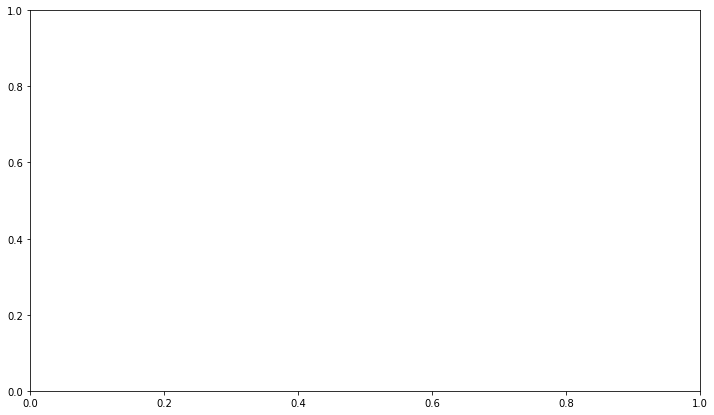

In [6]:



# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Conv1d(1, 2, 5)   # hidden layer
        self.pool1 = torch.nn.MaxPool1d(5,stride = 1)
        
        self.lin1 = torch.nn.Linear(92,150)
        
        self.lin2 = torch.nn.Linear(150,200)
        
        self.hidden2 = torch.nn.Conv1d(2,1,1)
        self.predict = torch.nn.Linear(200,100)   # output layer

    def forward(self, x):
#         IT IS NOT AN ISSUE WITH PASSING THE INFORMATION IN
#         plt.figure()
#         plt.plot(x.reshape(-1).detach())
#         plt.show()
        x = F.relu(self.hidden1(x)) # activation function for hidden layer
        x = self.pool1(x)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.relu(self.hidden2(x))
        x = self.predict(x)             # linear output
        return x

# net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
net = Net()
# print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam( net.parameters(), lr=0.02, weight_decay=0.0005 )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# totalTrainLoss = torch.zeros(1000)
# totalTestLoss = torch.zeros(1000)
# predictedMean = torch.zeros(1000)
# tauredMean = torch.zeros(1000)
predictions = torch.zeros(100)


# train the network
for t in range(1000):
#     randomIndex = np.random.randint(0,high=len(taured)-1)
    y, x = createTrainer(100)
#     print(y.shape)
#     print(x.shape)
    prediction = net(y)     # input x and predict based on x
    loss = loss_func(prediction, x)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    scheduler.step()        # scheduler decreases learning rate geometrically every n epochs
#     predictions[t] = prediction
    
#     testLoss = validate()
#     totalTrainLoss[t] = loss
#     totalTestLoss[t] = testLoss
#     predictedMean[t] = prediction.mean()
#     tauredMean[t] = x.mean()
    
    print("Epoch = ", t)
    print("Training Loss = ", loss)
#     print("Test Loss = ", testLoss)
    
    # plot and show learning process
#     plt.cla()
#     ax.set_title('Regression Analysis', fontsize=35)
#     ax.set_xlabel('', fontsize=24)
#     ax.set_ylabel('Tau', fontsize=24)
#     ax.plot(x.data.numpy(), "r.")
#     ax.plot(prediction.data.numpy(), 'g.', lw=3)
#     ax.text(0.6, 0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
#     ax.text(0.6, 0.7, 'Loss = %.4f' % loss.data.numpy(),
#             fontdict={'size': 24, 'color':  'red'})
    
#     ax.set_xlim(0,1.0)
#     ax.set_ylim(0,1.0)

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
#     fig.canvas.draw()       # draw the canvas, cache the renderer
#     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#     my_images.append(image)
    
   


# # save images as a gif    
# imageio.mimsave('./linear_prediction.gif', my_images, fps=10)



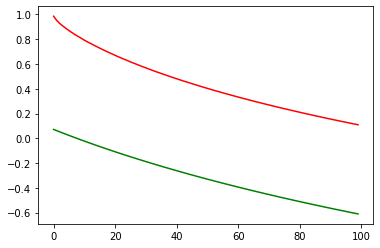

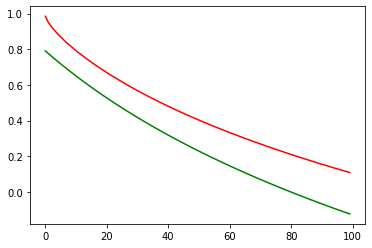

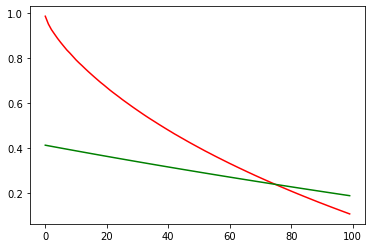

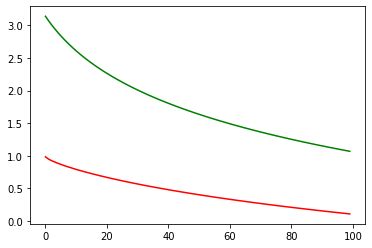

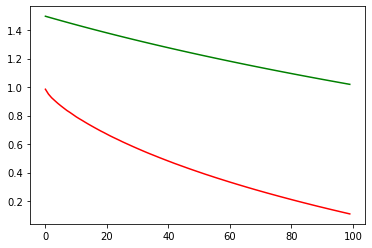

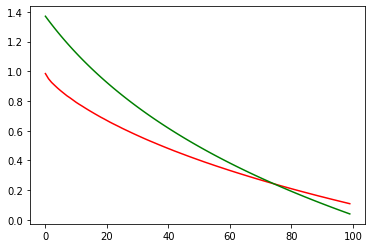

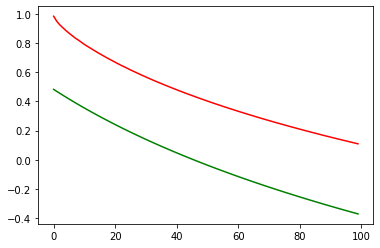

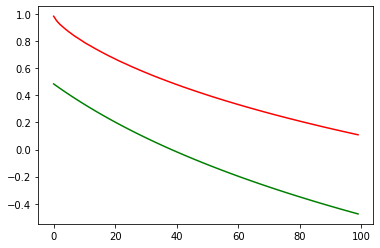

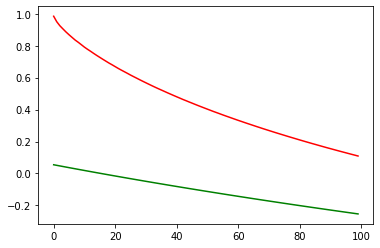

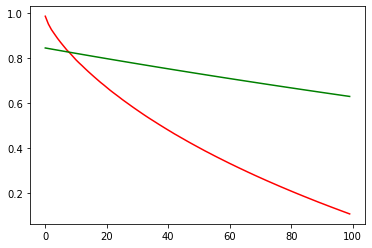

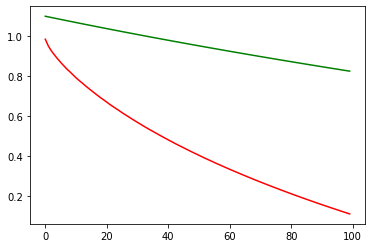

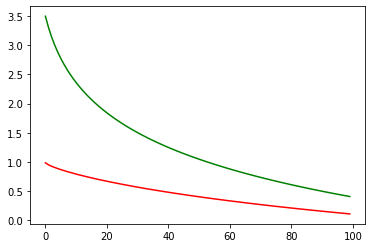

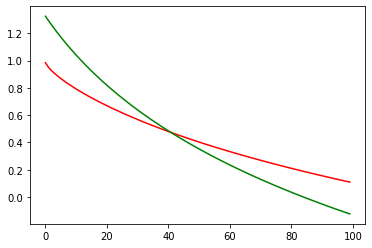

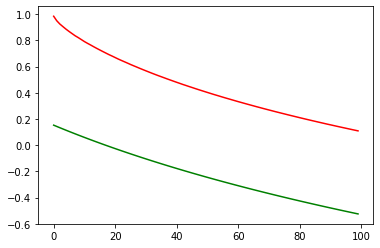

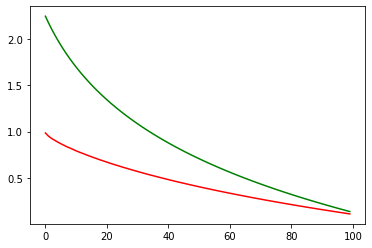

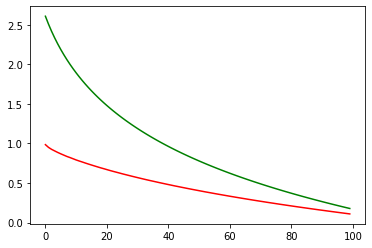

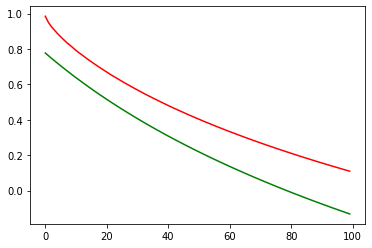

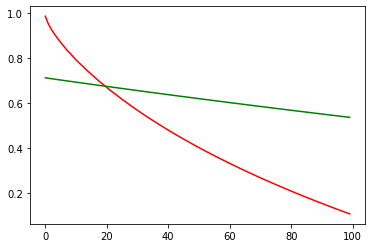

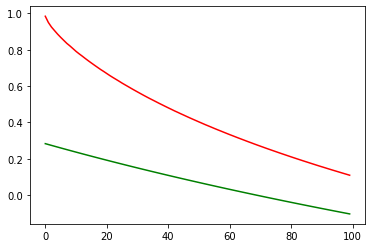

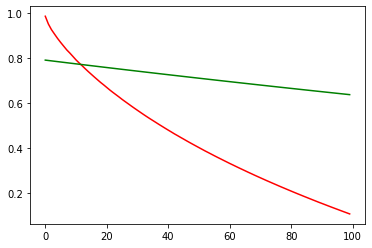

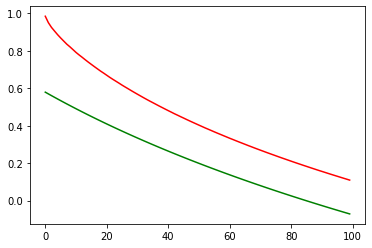

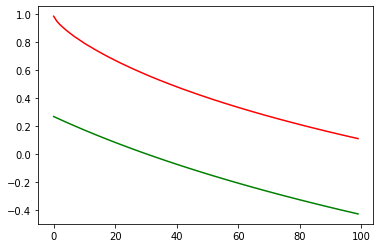

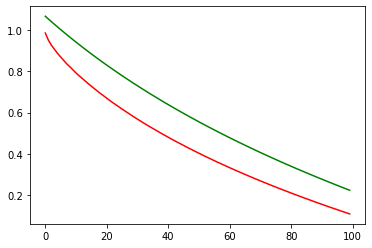

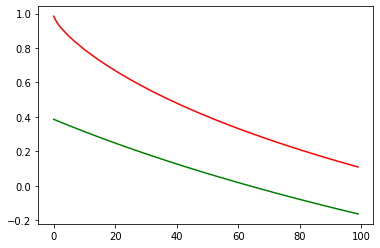

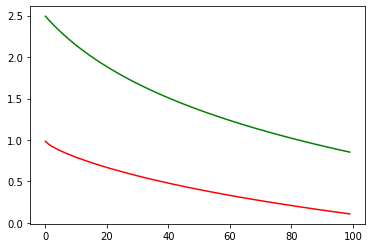

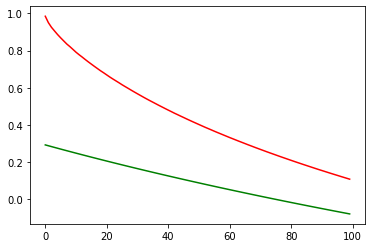

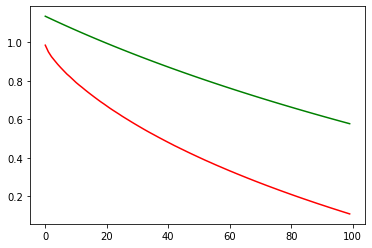

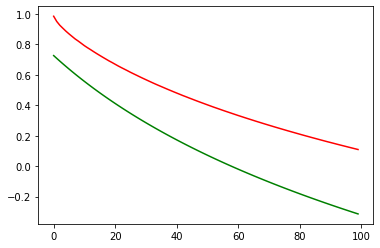

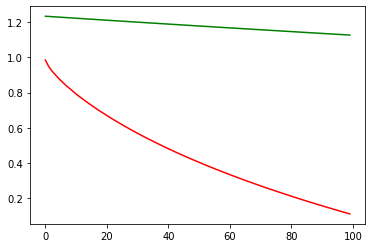

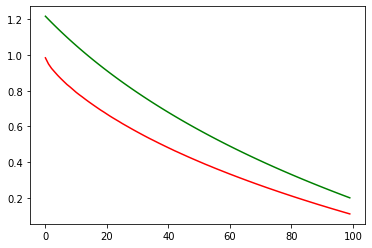

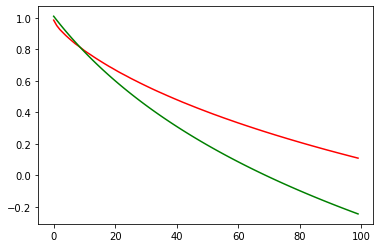

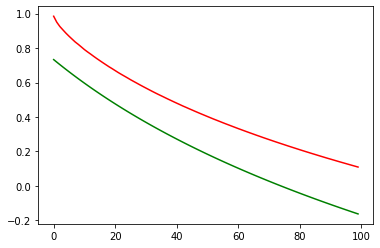

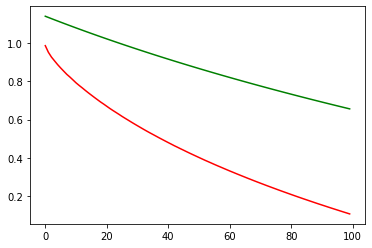

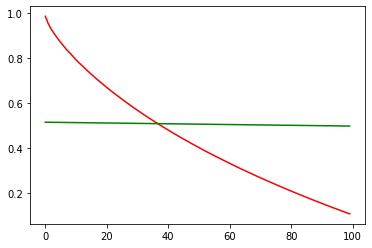

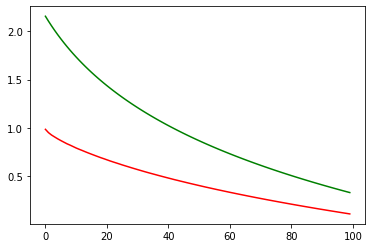

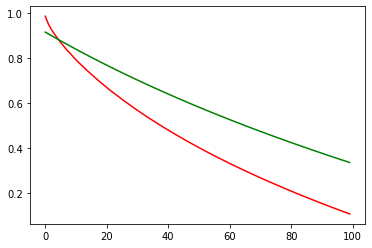

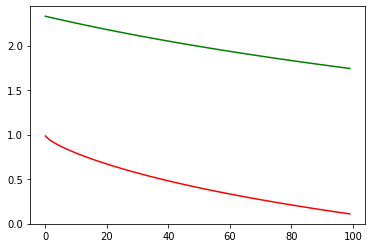

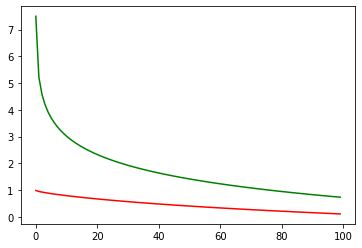

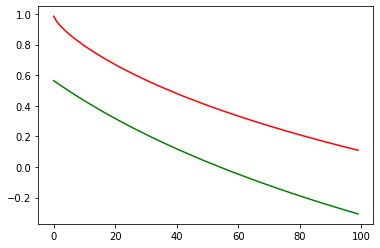

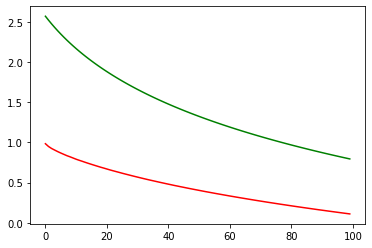

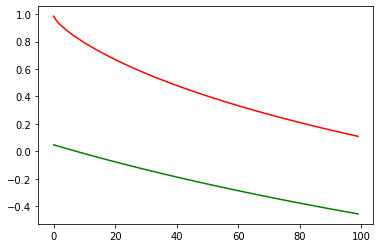

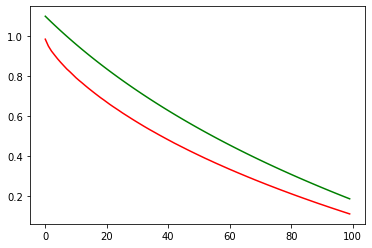

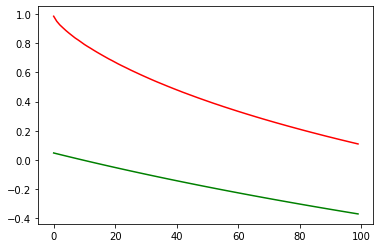

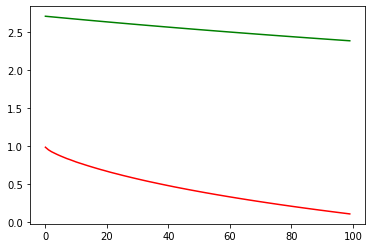

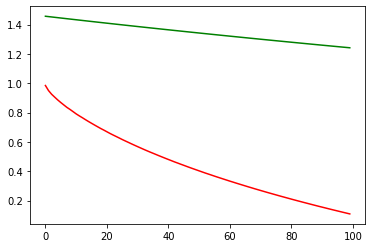

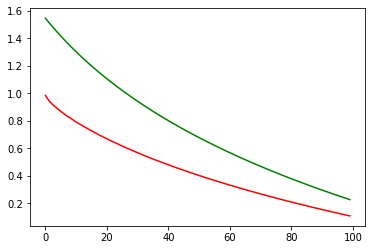

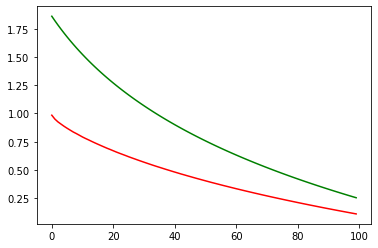

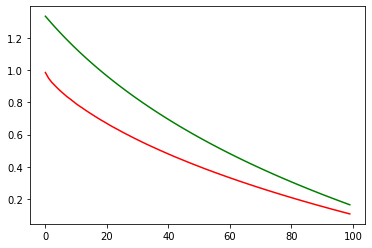

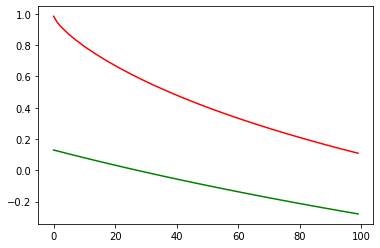

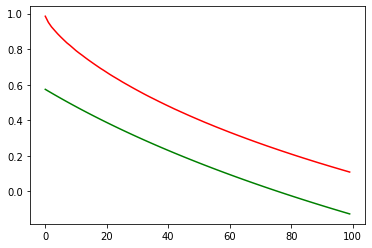

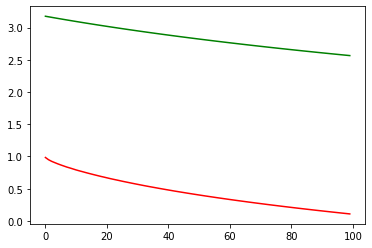

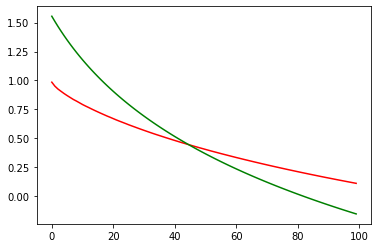

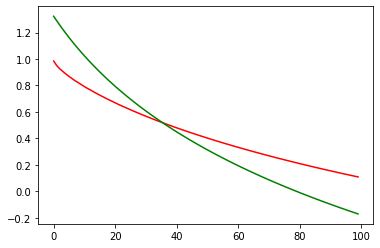

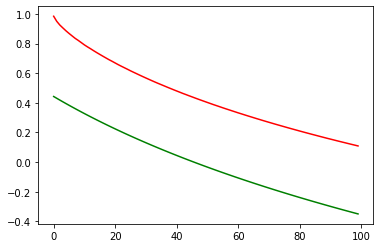

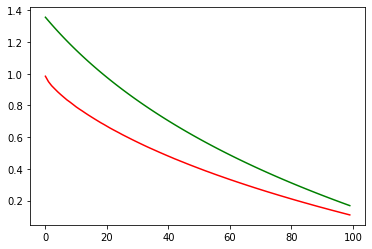

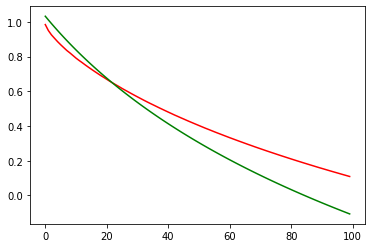

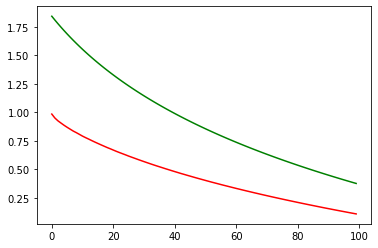

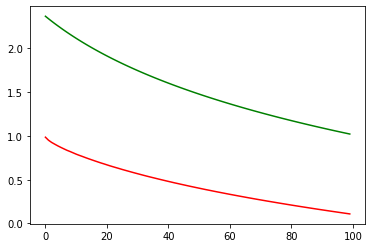

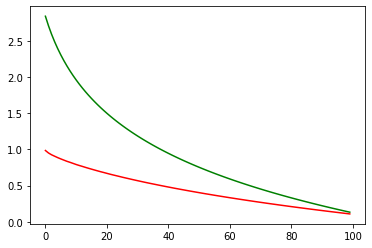

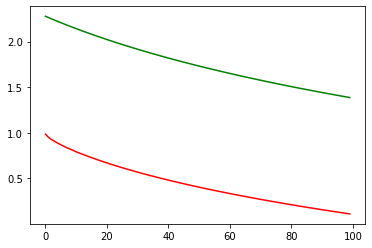

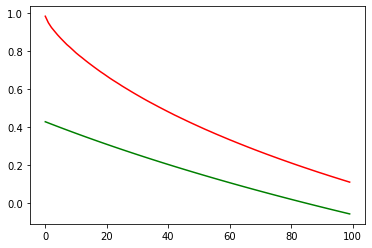

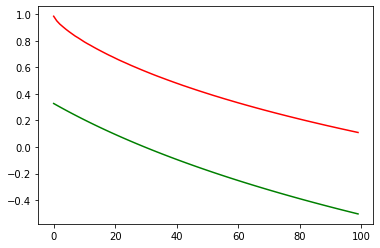

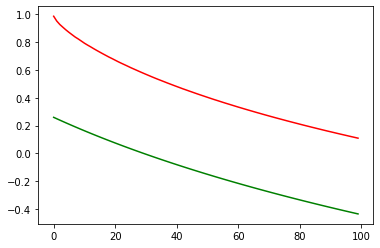

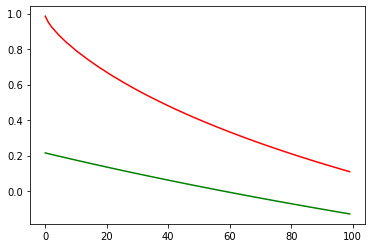

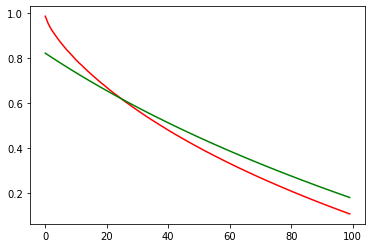

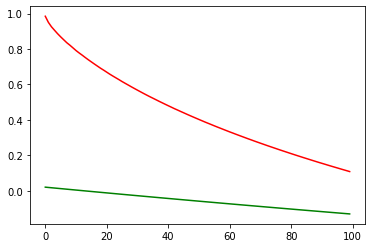

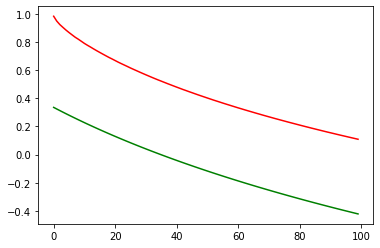

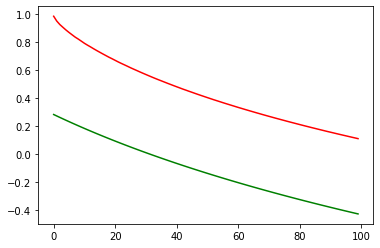

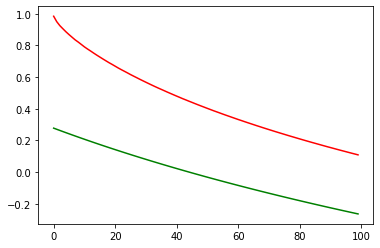

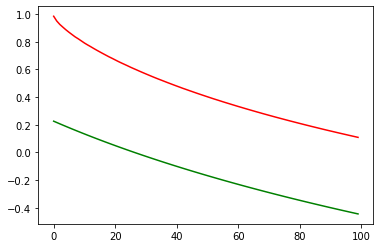

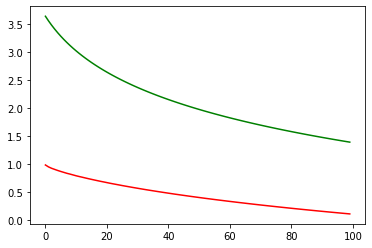

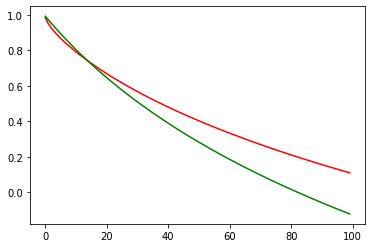

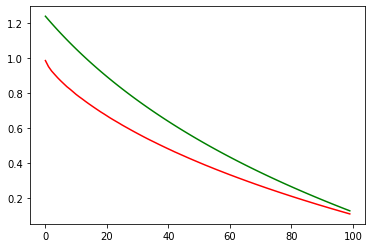

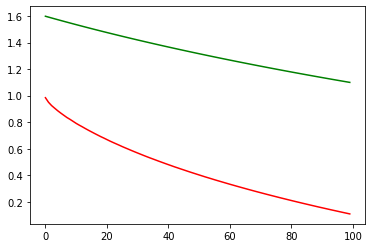

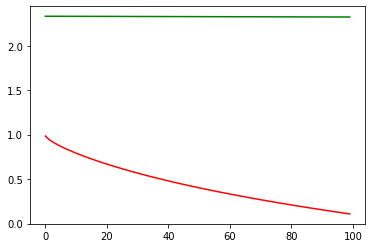

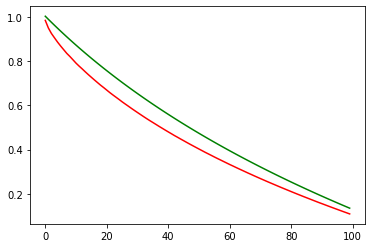

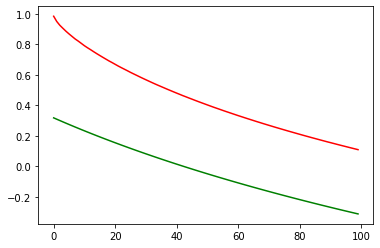

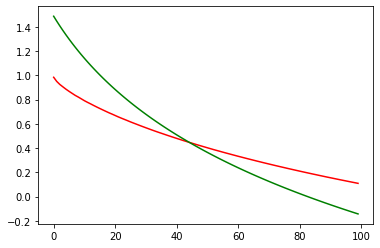

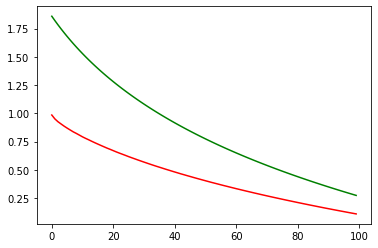

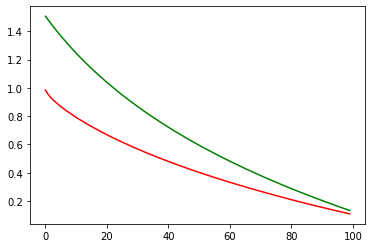

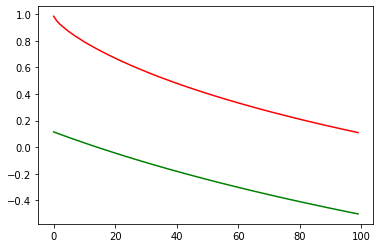

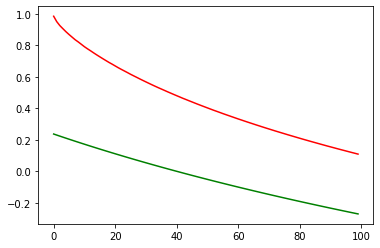

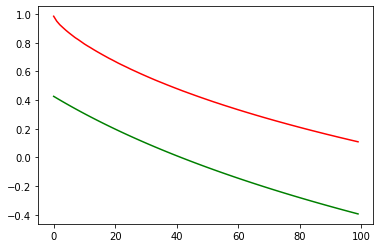

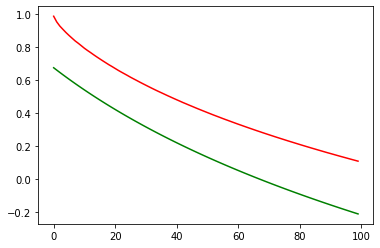

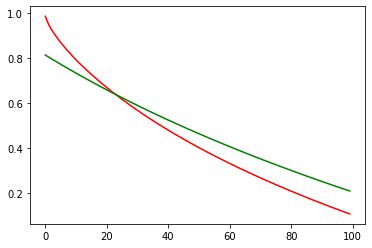

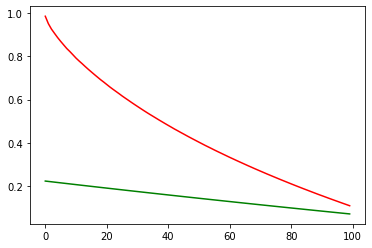

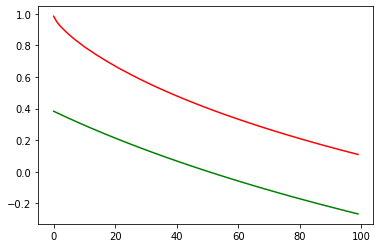

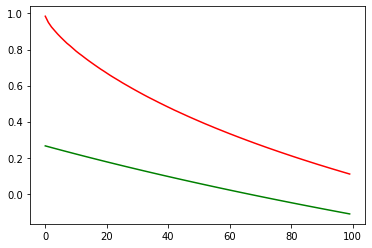

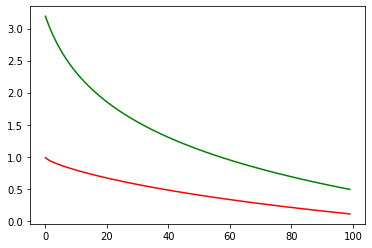

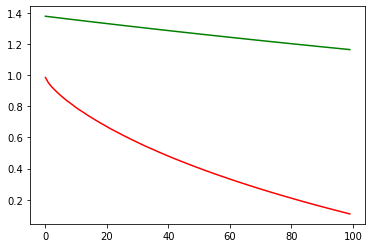

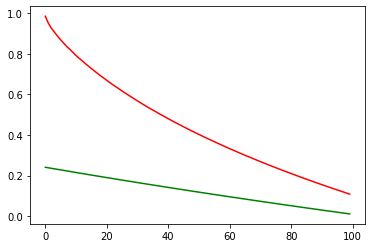

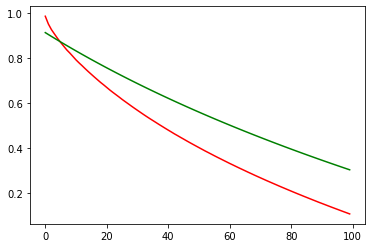

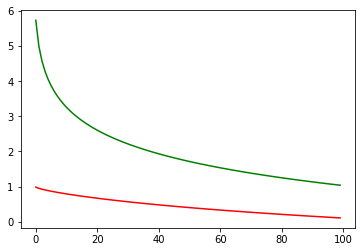

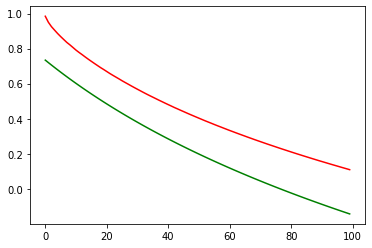

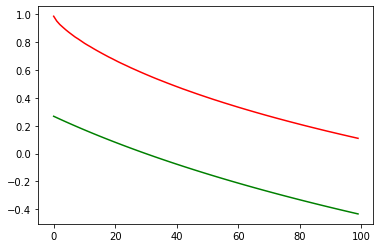

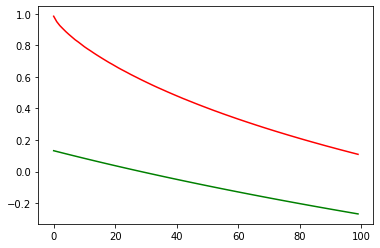

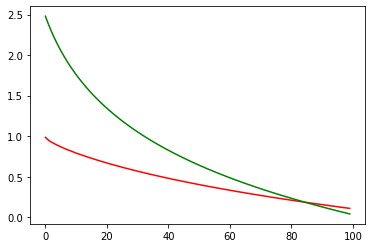

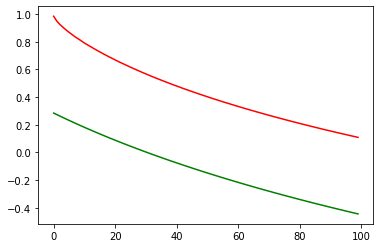

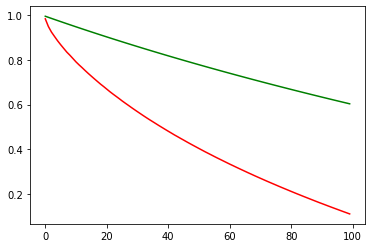

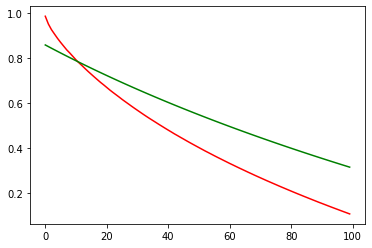

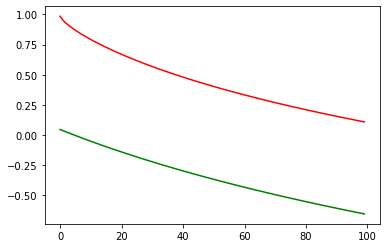

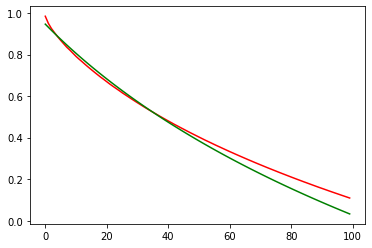

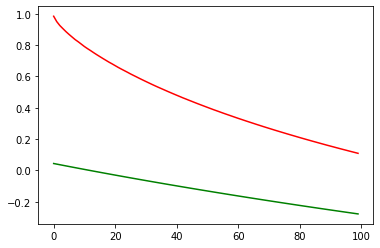

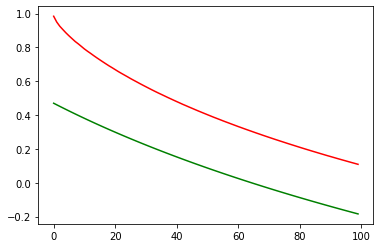

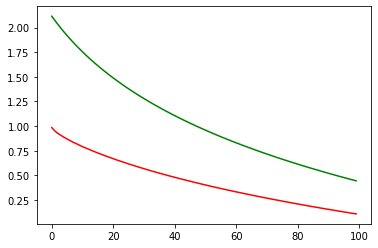

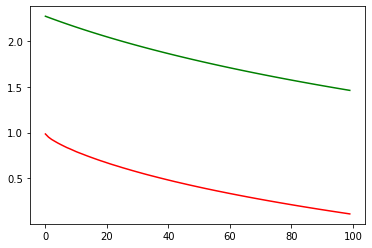

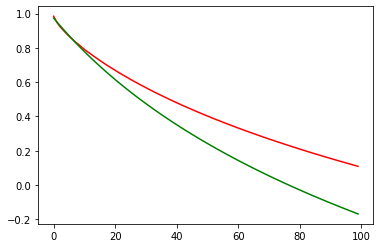

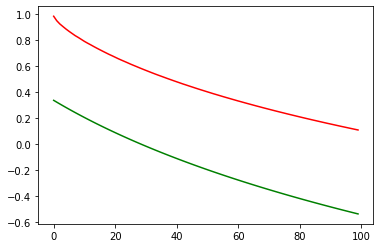

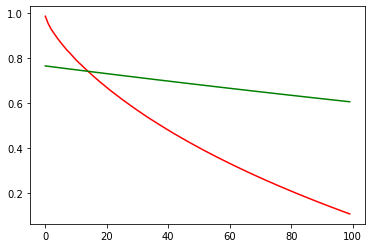

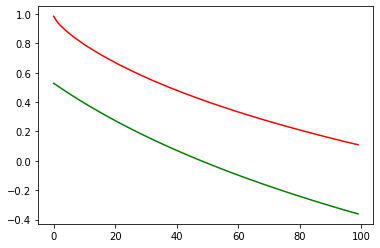

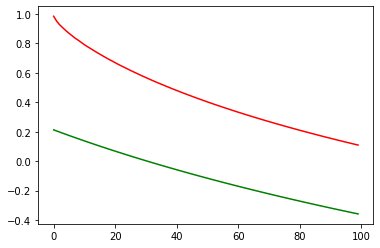

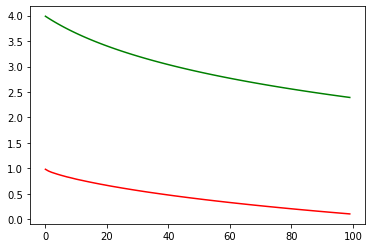

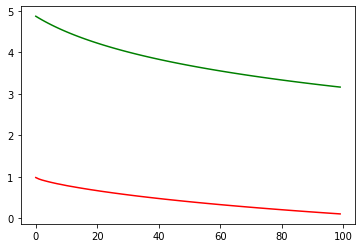

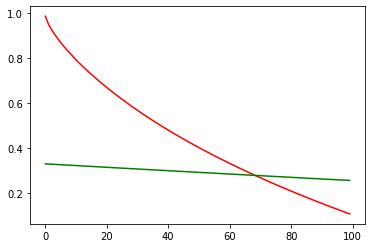

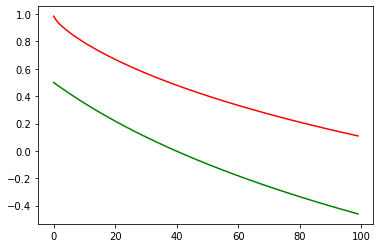

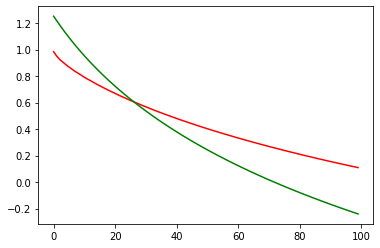

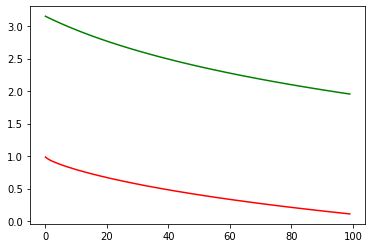

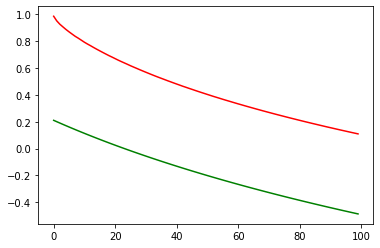

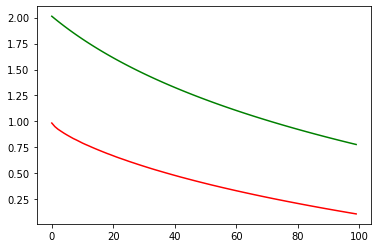

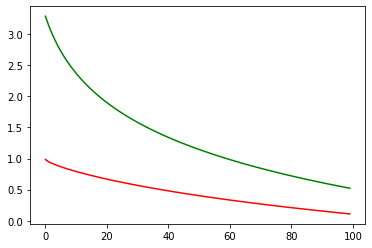

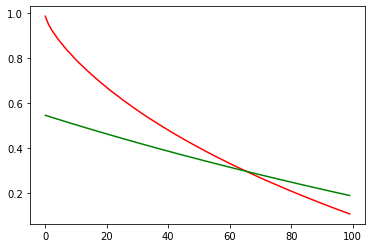

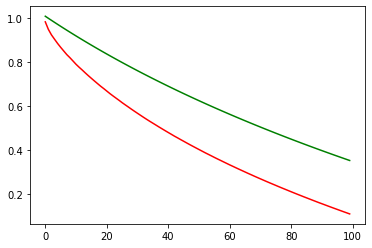

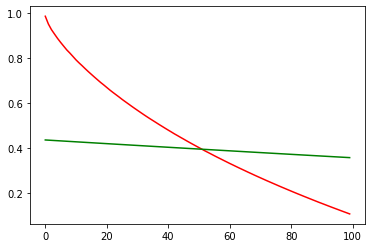

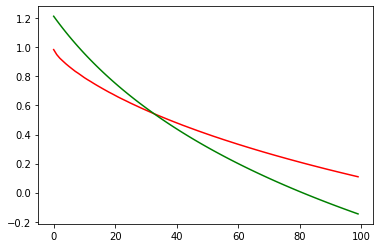

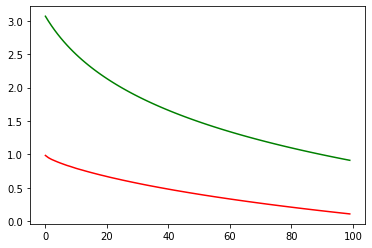

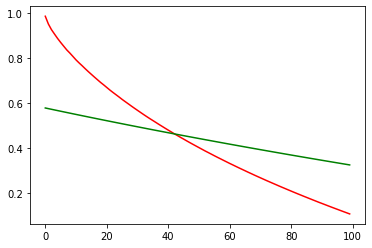

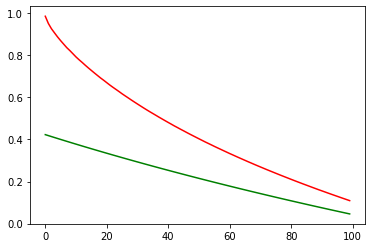

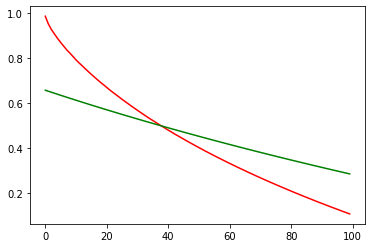

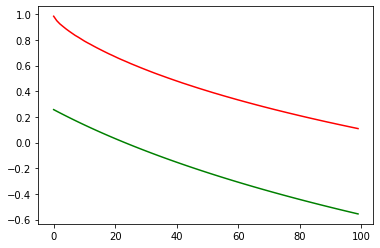

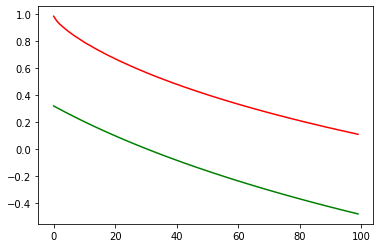

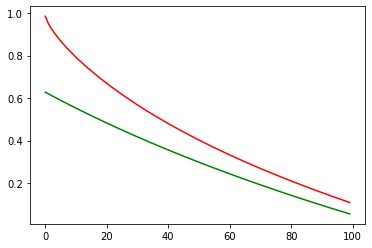

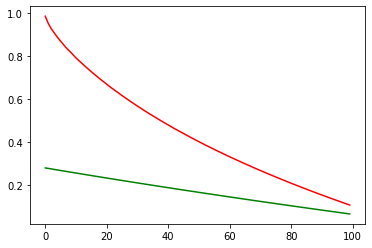

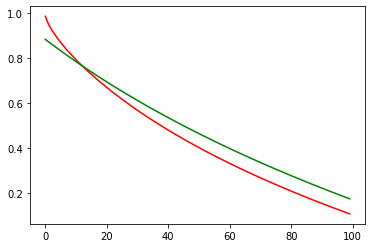

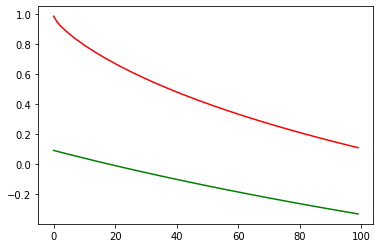

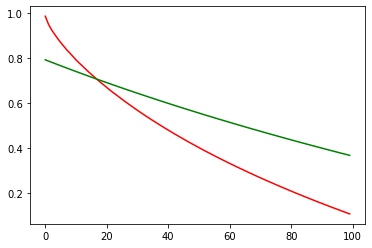

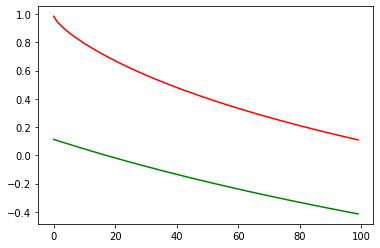

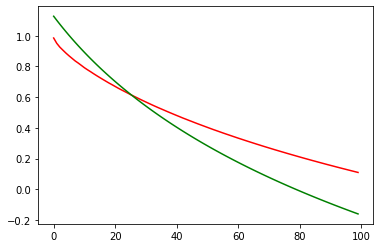

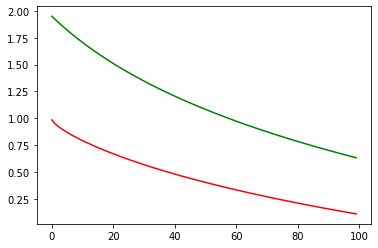

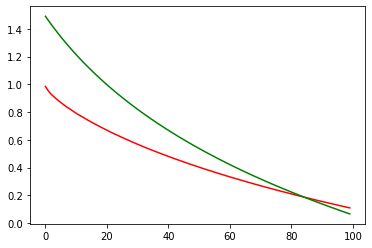

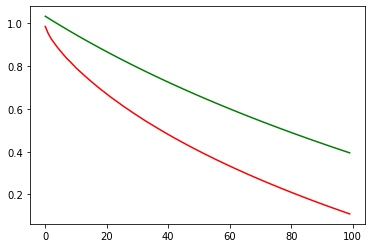

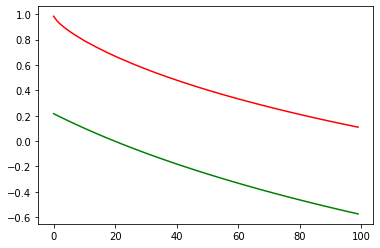

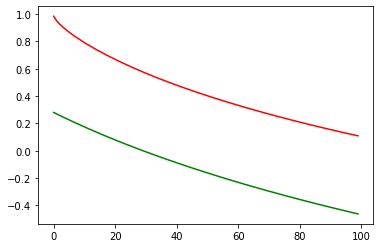

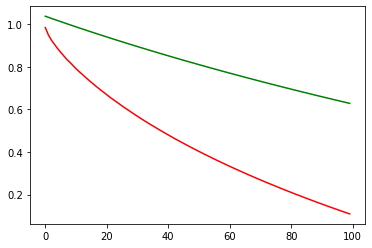

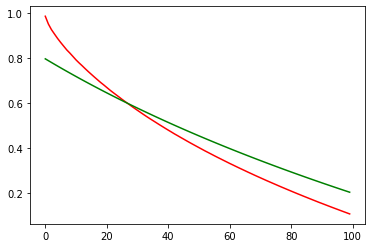

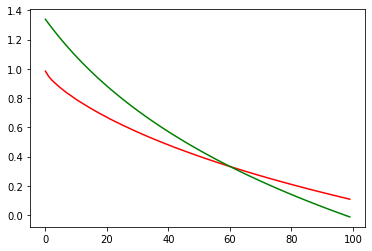

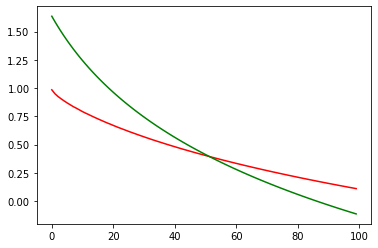

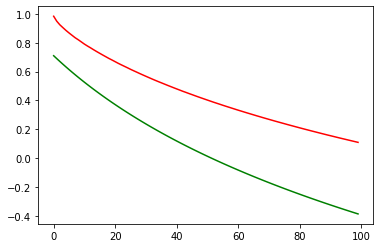

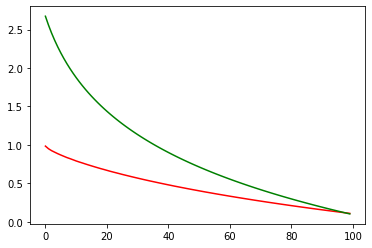

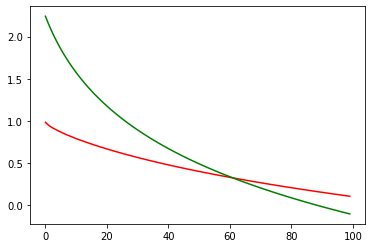

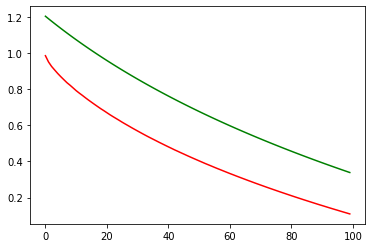

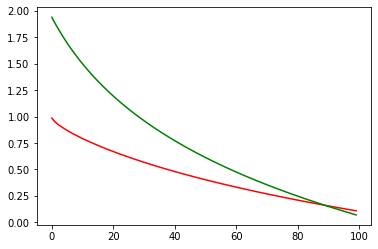

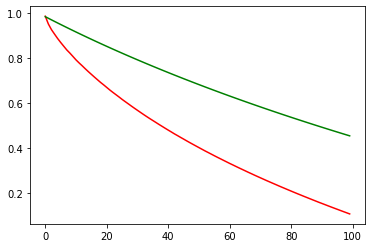

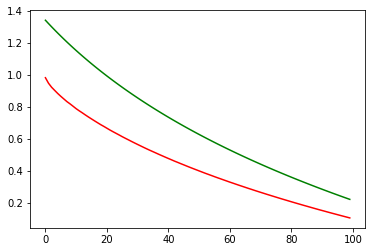

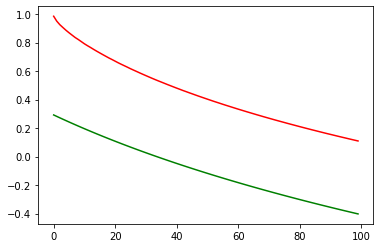

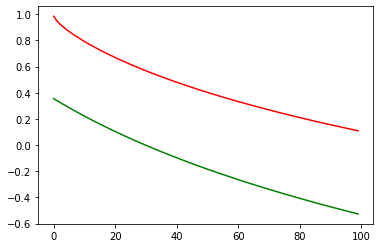

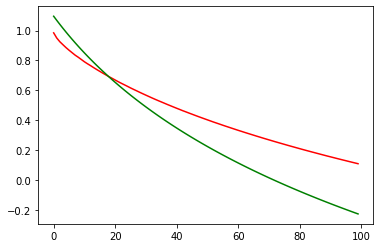

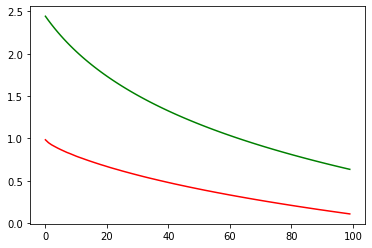

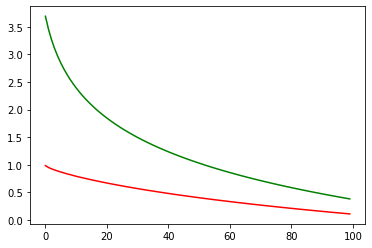

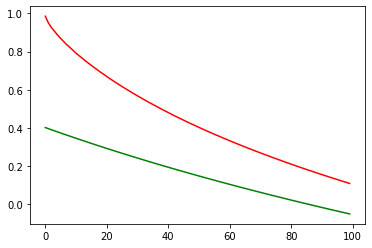

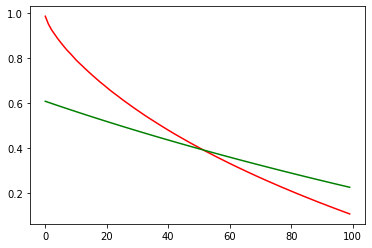

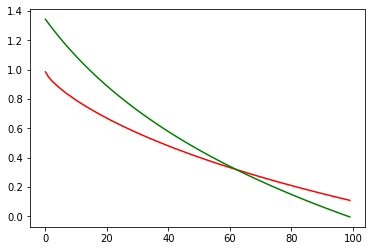

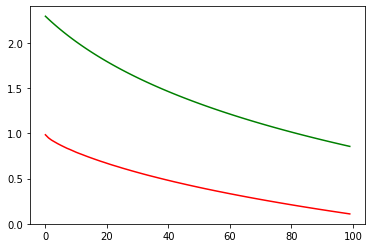

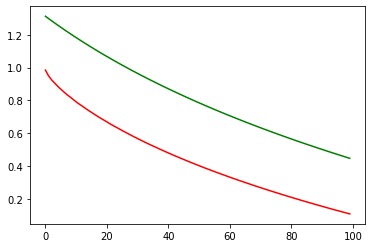

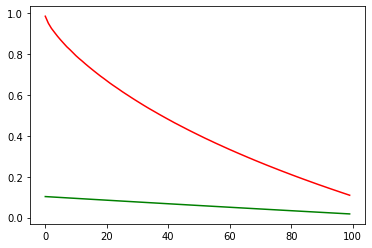

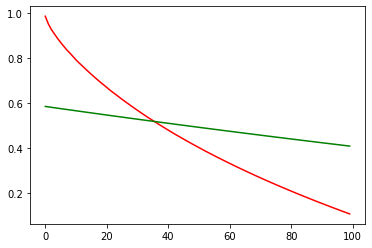

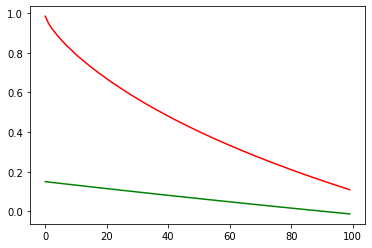

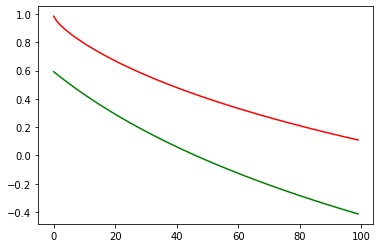

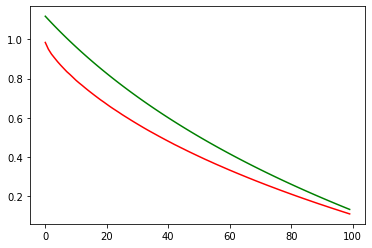

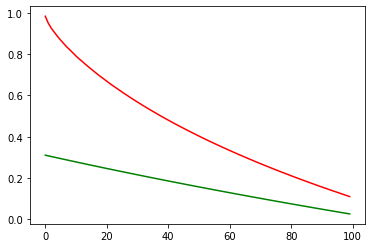

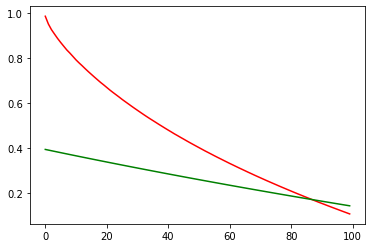

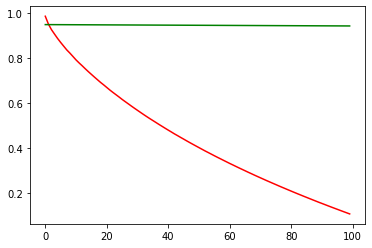

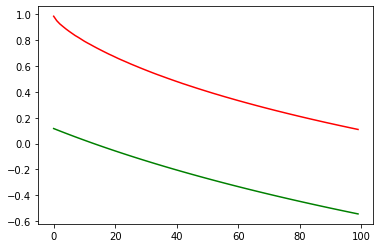

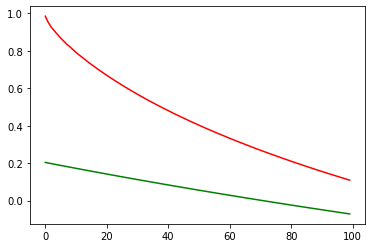

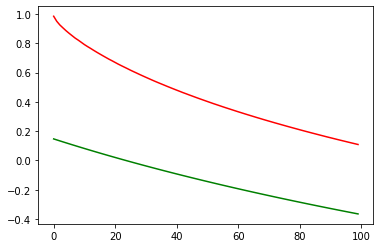

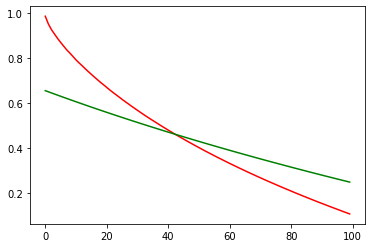

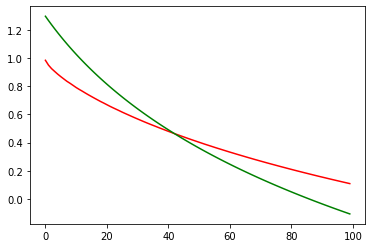

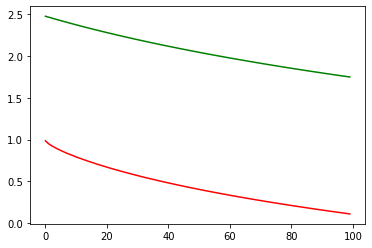

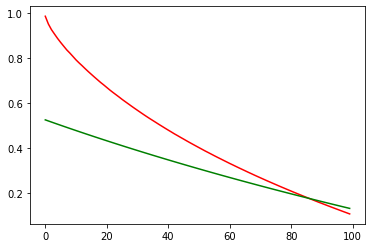

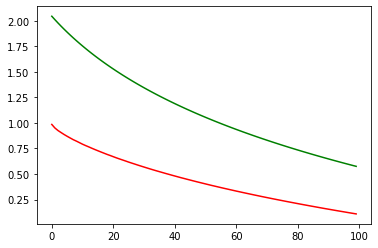

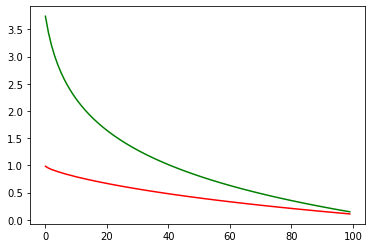

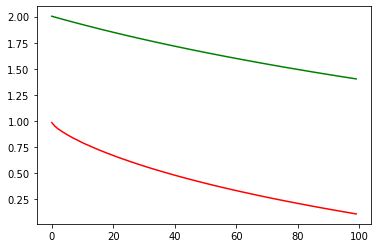

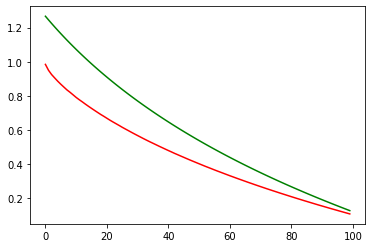

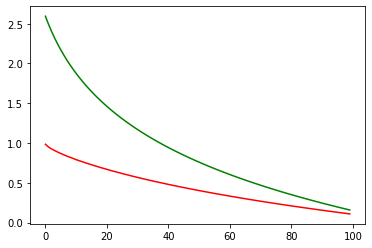

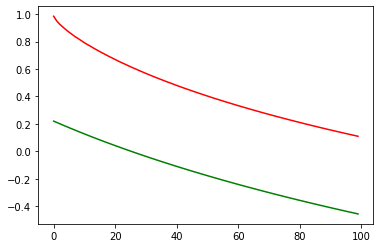

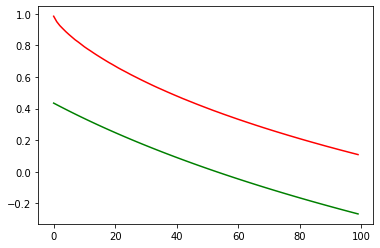

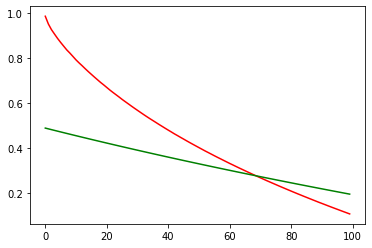

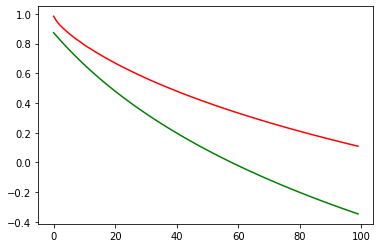

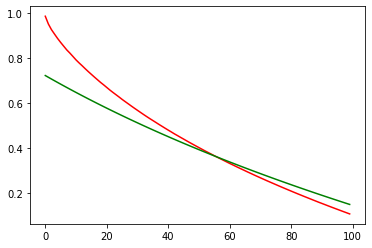

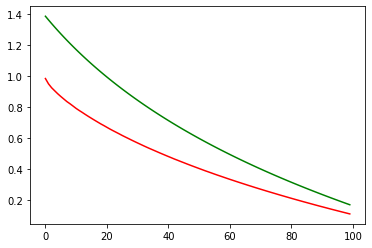

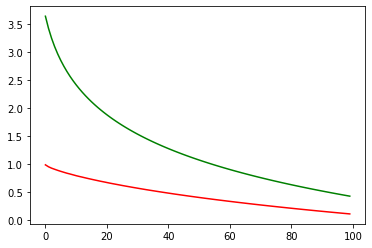

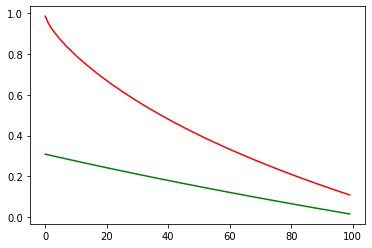

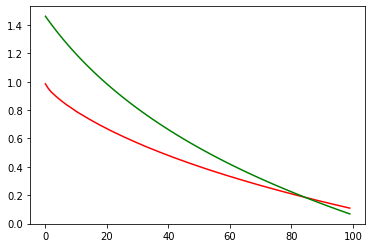

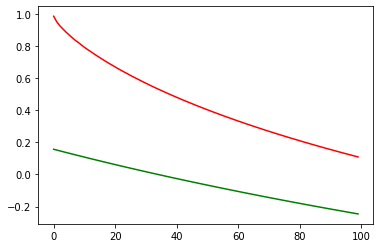

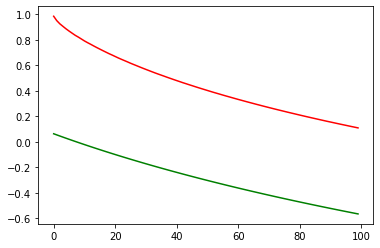

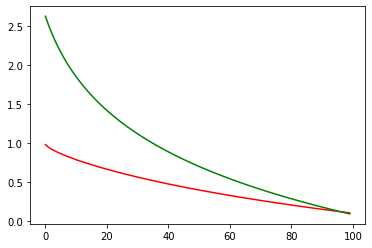

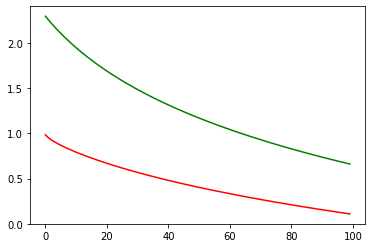

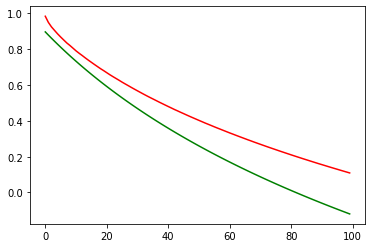

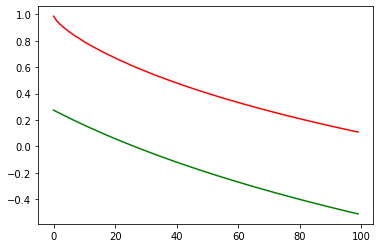

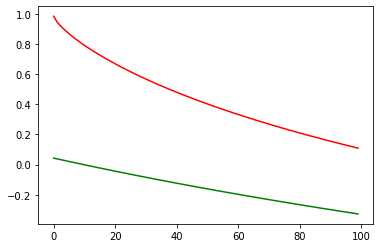

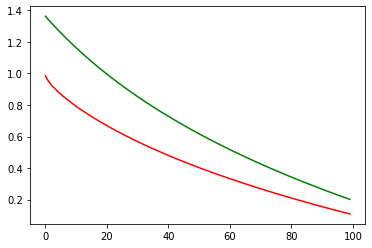

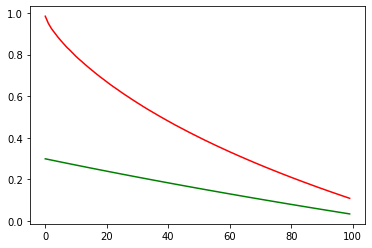

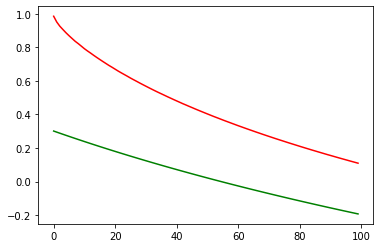

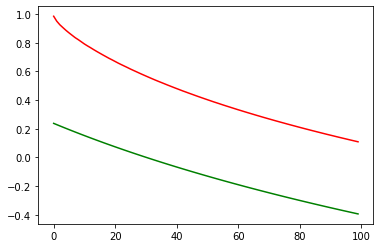

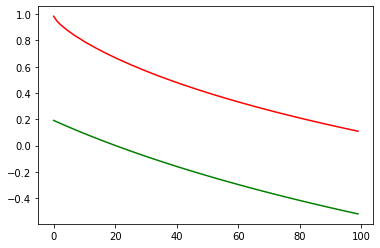

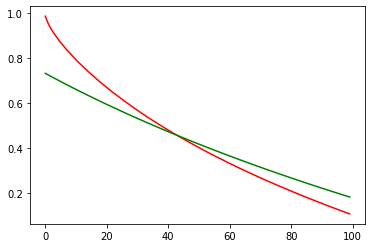

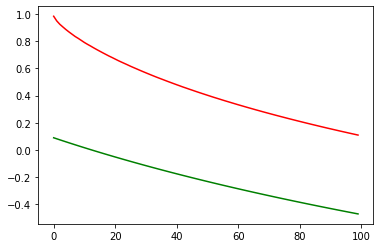

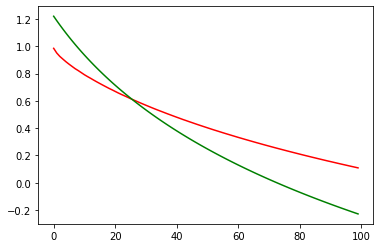

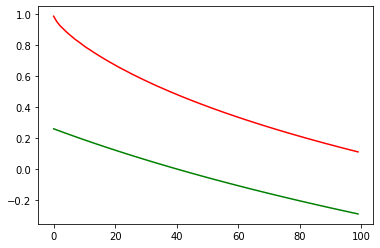

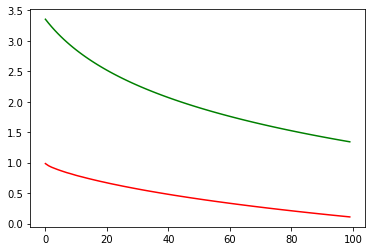

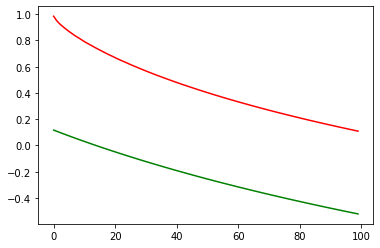

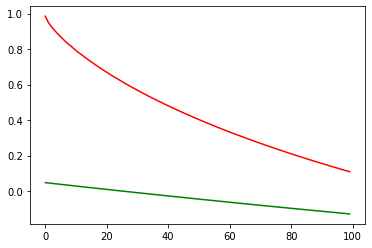

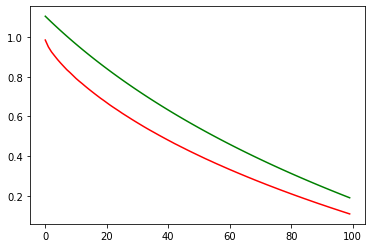

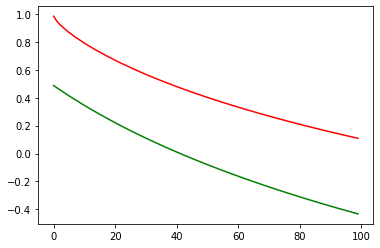

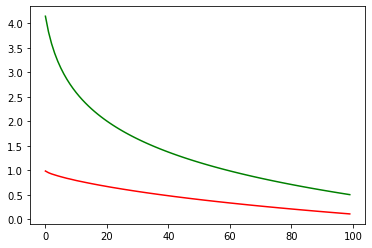

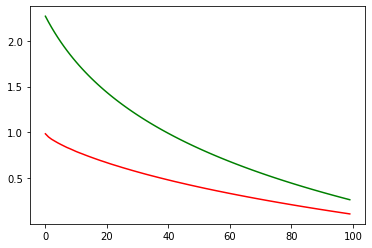

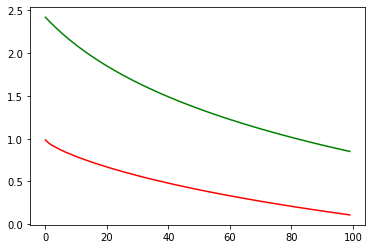

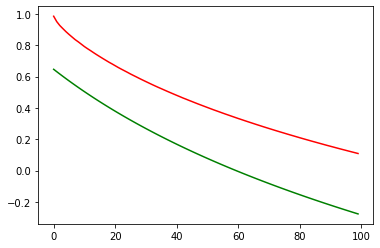

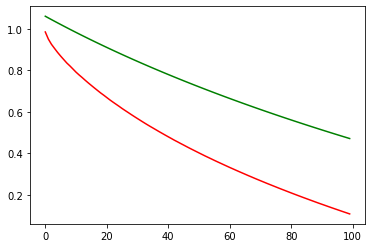

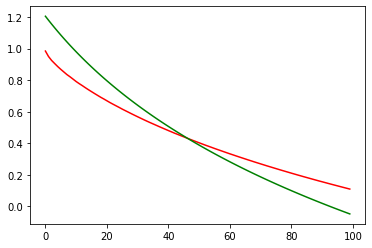

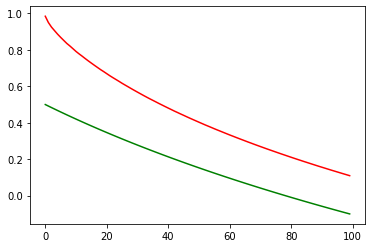

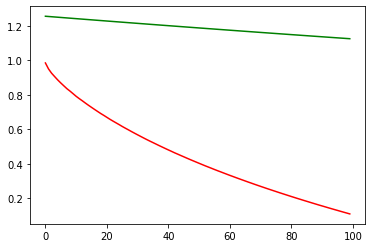

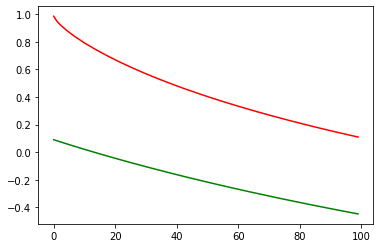

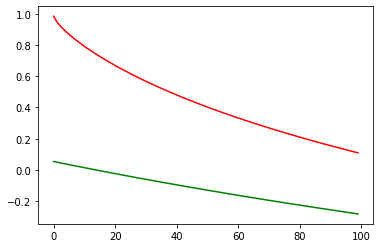

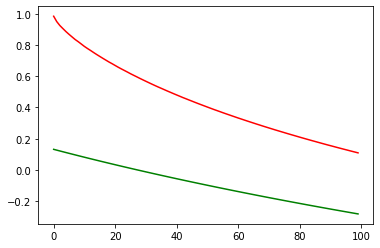

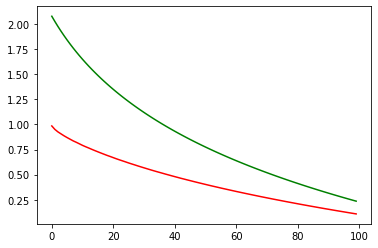

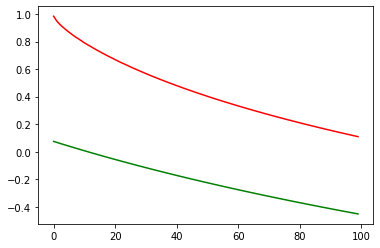

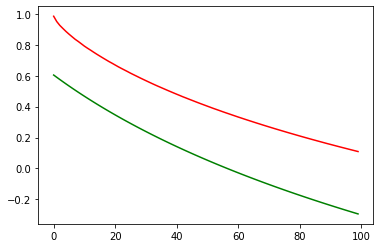

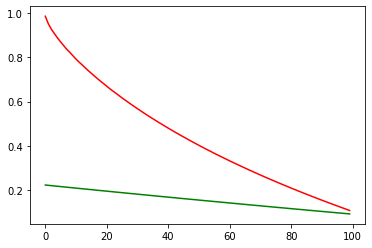

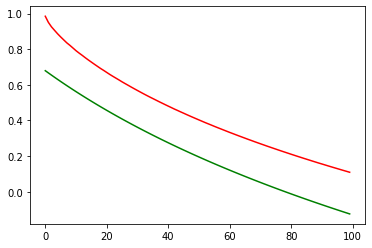

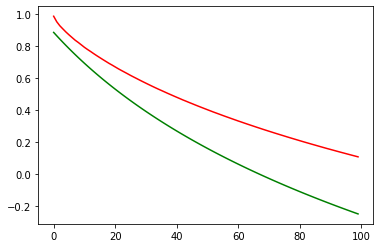

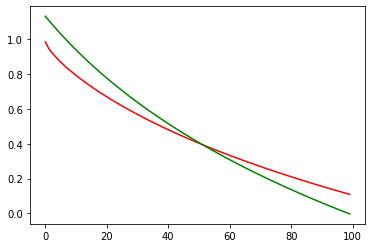

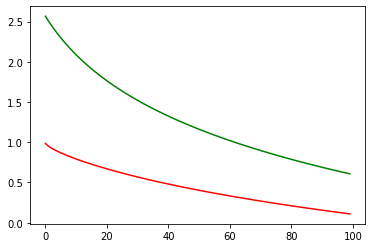

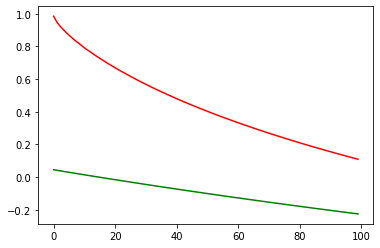

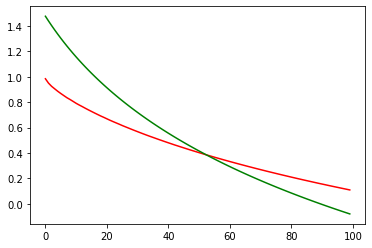

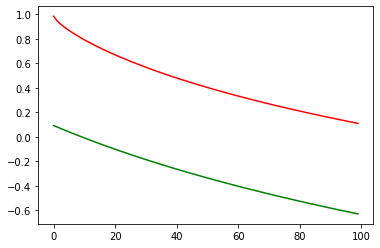

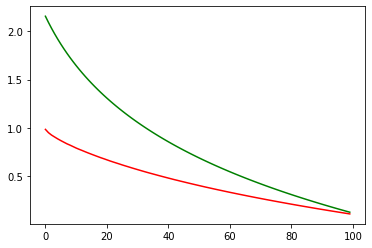

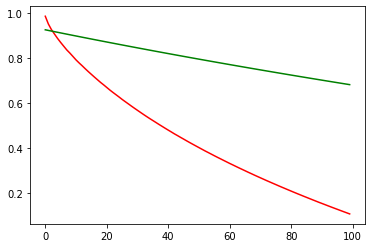

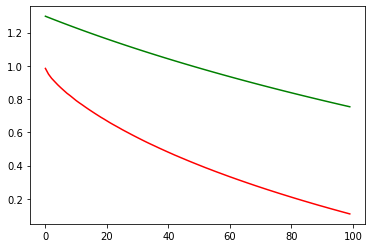

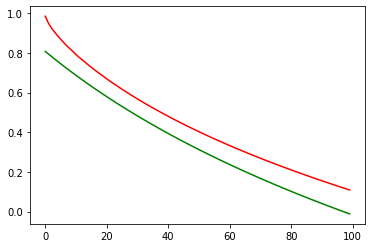

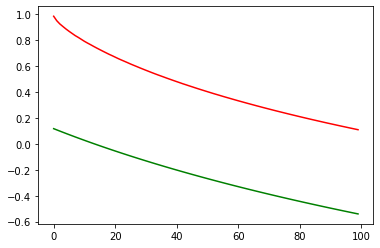

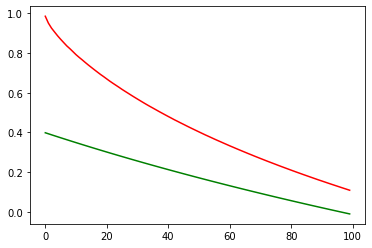

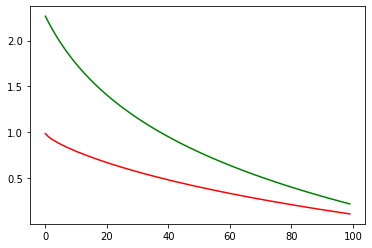

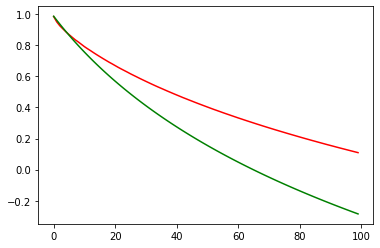

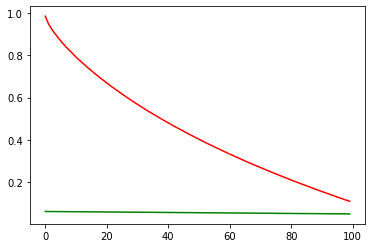

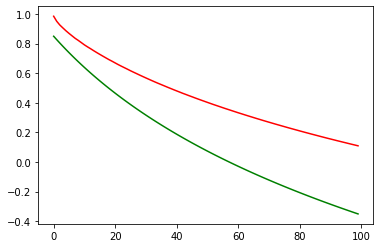

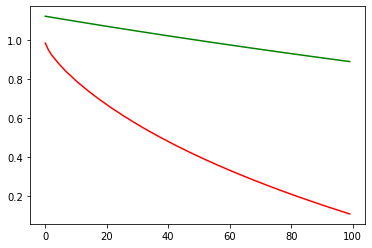

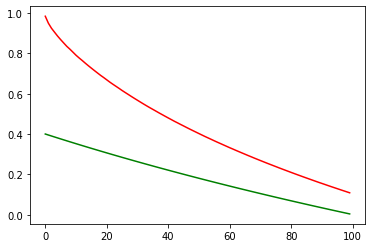

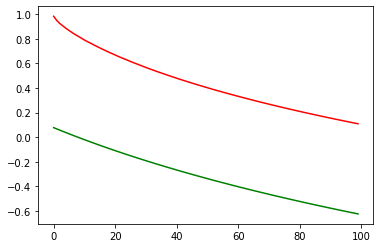

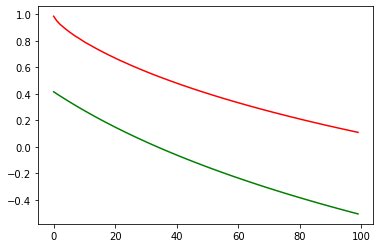

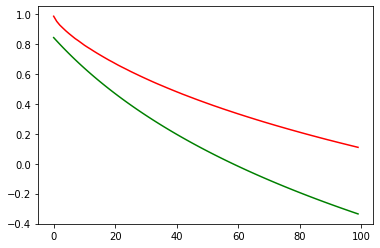

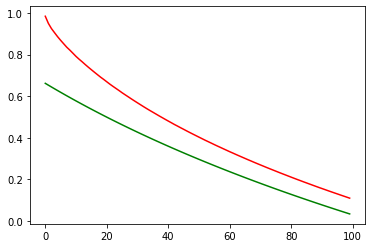

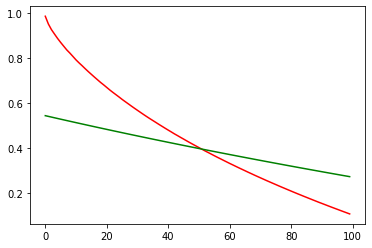

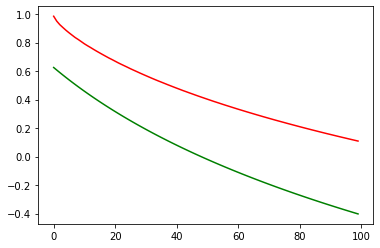

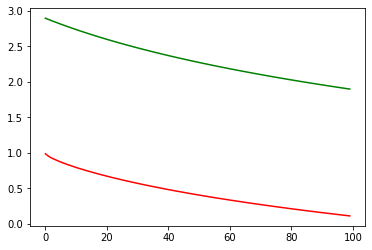

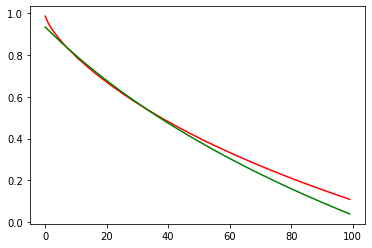

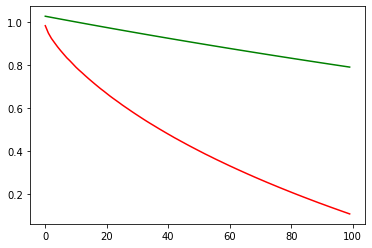

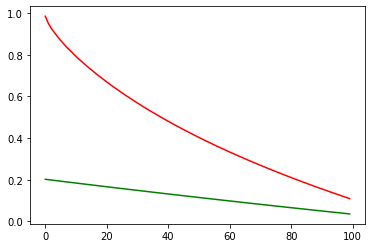

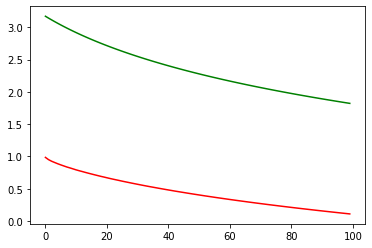

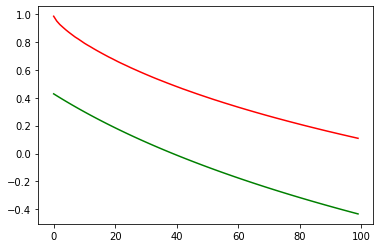

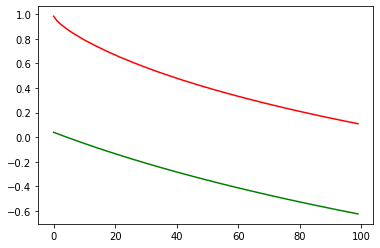

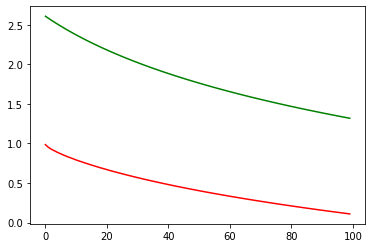

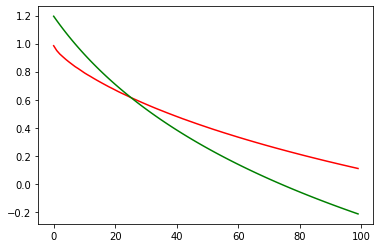

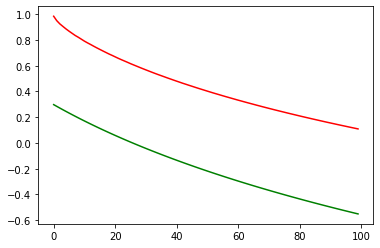

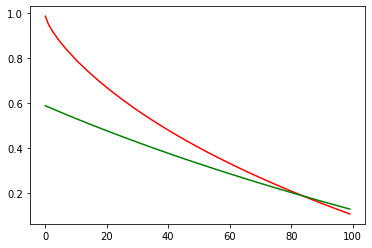

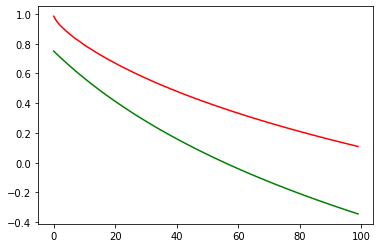

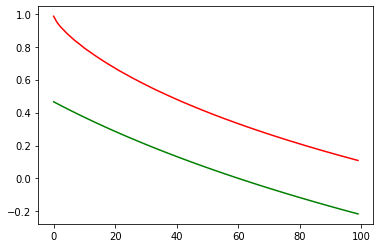

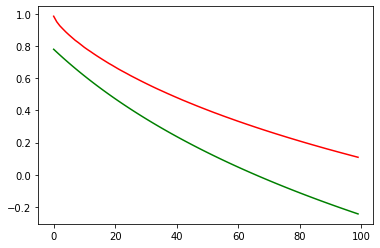

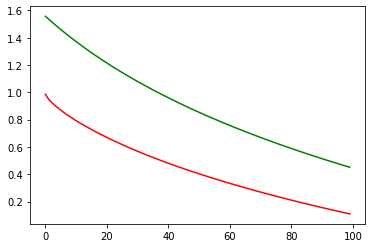

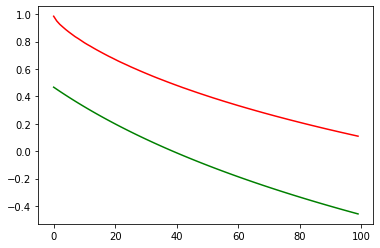

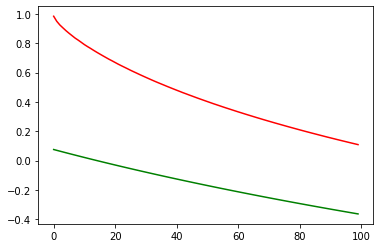

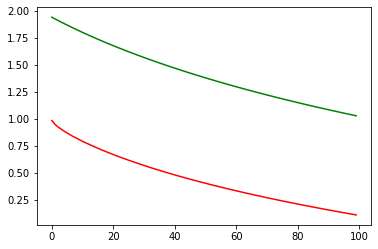

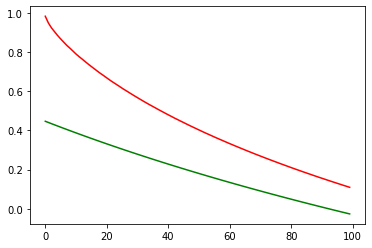

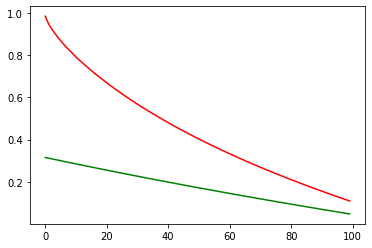

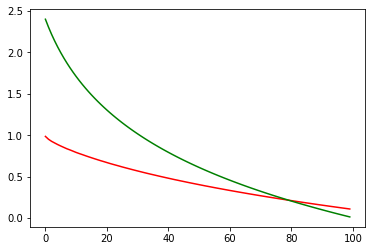

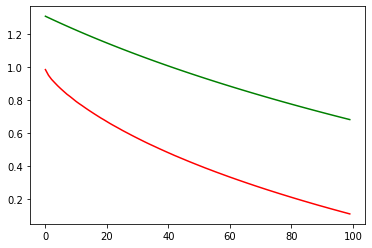

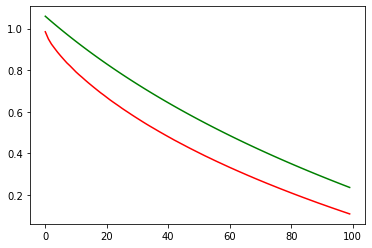

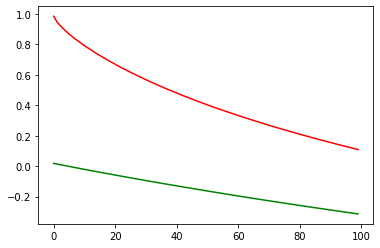

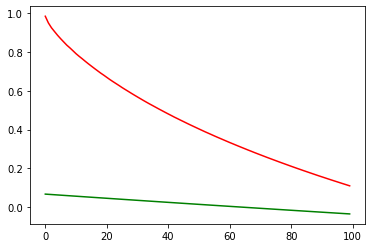

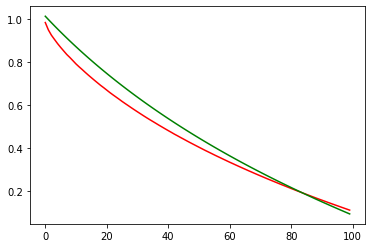

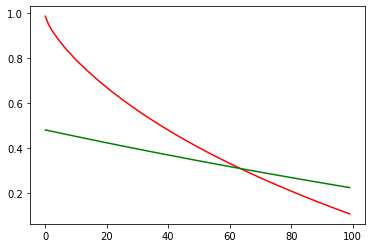

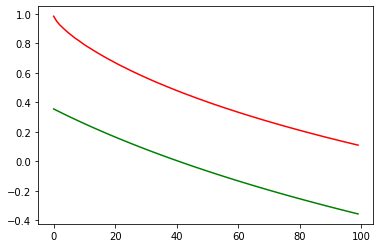

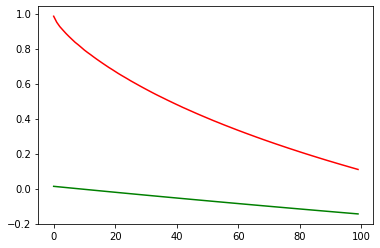

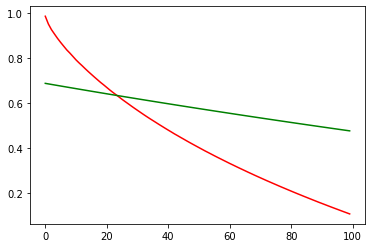

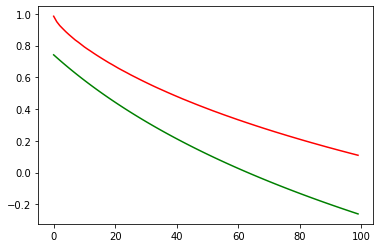

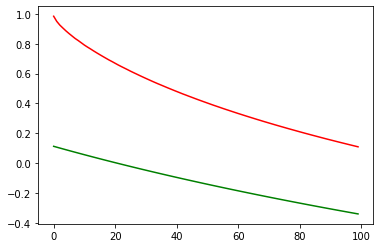

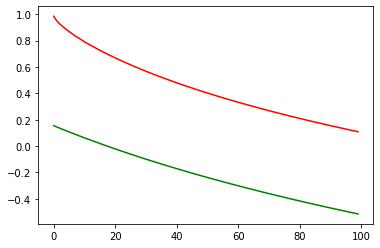

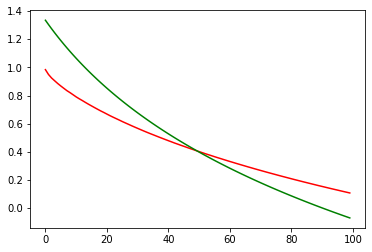

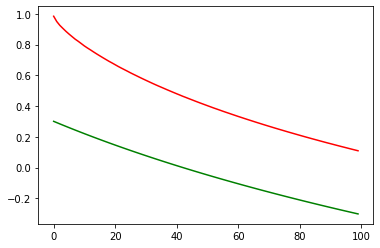

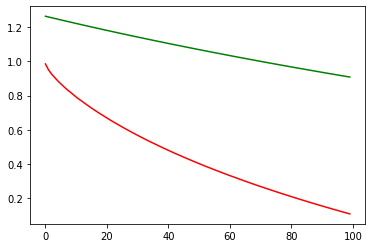

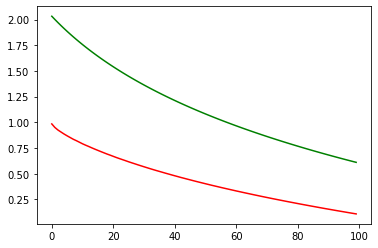

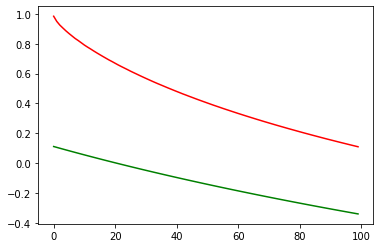

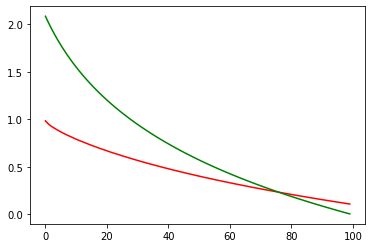

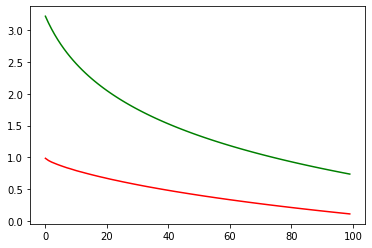

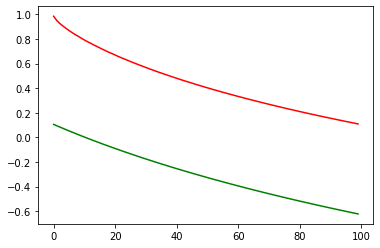

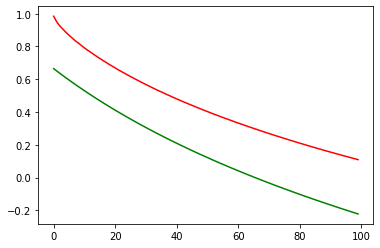

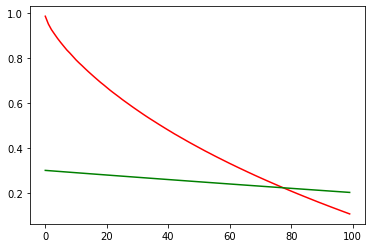

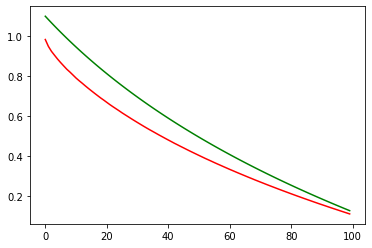

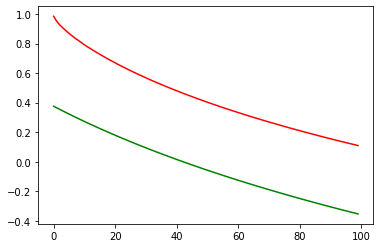

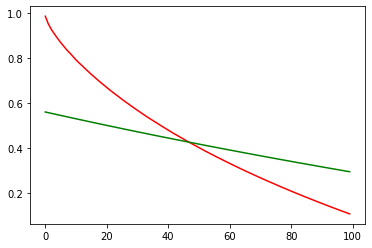

KeyboardInterrupt: 

In [7]:


net.eval()
with torch.no_grad():
    for i in range(3):
        y,x = createTrainer(100)
        prediction = net(y)
#         plt.figure()
#         plt.plot(prediction.detach().numpy(), "r")
#         plt.plot(x.detach().numpy(), "g")
        for j in range(100):
            plt.figure()
            plt.plot(prediction[j,0].detach().numpy(), "r")
            plt.plot(x[j,0].detach().numpy(), "g")
            plt.show()
    
net.train()

In [1]:




# this is one way to define a network
class Net2(torch.nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
#         self.hidden1 = torch.nn.Conv1d(1, 2, 5)   # hidden layer
#         self.pool1 = torch.nn.MaxPool1d(5,stride = 1)
#         self.hidden2 = torch.nn.Conv1d(2,1,1)
        self.hidden3 = torch.nn.Linear(100,10)
        self.predict = torch.nn.Linear(10, 1)   # output layer
        self.oldPrediction = torch.zeros(512)

    def forward(self, x):
#         IT IS NOT AN ISSUE WITH PASSING THE INFORMATION IN
#         plt.figure()
#         plt.plot(x.reshape(-1).detach())
#         plt.show()
#         x = F.relu(self.hidden1(x)) # activation function for hidden layer
#         x = self.pool1(x)
#         x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.predict(x)             # linear output
        x = x.reshape(-1)
        return x

# net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
net2 = Net2()
# print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam( net.parameters(), lr=0.002, weight_decay=0.0005 )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# totalTrainLoss = torch.zeros(1000)
# totalTestLoss = torch.zeros(1000)
# predictedMean = torch.zeros(1000)
# tauredMean = torch.zeros(1000)
predictions = torch.zeros(100)


# train the network
for t in range(100):
#     randomIndex = np.random.randint(0,high=len(taured)-1)
    y = ins[t,...]
    y = torch.reshape(y, (-1,1,100))
    prediction = net(y)     # input x and predict based on x
    loss = loss_func(prediction, outs[t])     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    scheduler.step()        # scheduler decreases learning rate geometrically every n epochs
    predictions[t] = prediction
    
#     testLoss = validate()
#     totalTrainLoss[t] = loss
#     totalTestLoss[t] = testLoss
#     predictedMean[t] = prediction.mean()
#     tauredMean[t] = x.mean()
    
    print("Epoch = ", t)
    print("Training Loss = ", loss)
#     print("Test Loss = ", testLoss)
    
    # plot and show learning process
#     plt.cla()
#     ax.set_title('Regression Analysis', fontsize=35)
#     ax.set_xlabel('', fontsize=24)
#     ax.set_ylabel('Tau', fontsize=24)
#     ax.plot(x.data.numpy(), "r.")
#     ax.plot(prediction.data.numpy(), 'g.', lw=3)
#     ax.text(0.6, 0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
#     ax.text(0.6, 0.7, 'Loss = %.4f' % loss.data.numpy(),
#             fontdict={'size': 24, 'color':  'red'})
    
#     ax.set_xlim(0,1.0)
#     ax.set_ylim(0,1.0)

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
#     fig.canvas.draw()       # draw the canvas, cache the renderer
#     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#     my_images.append(image)
    
   


# # save images as a gif    
# imageio.mimsave('./linear_prediction.gif', my_images, fps=10)



NameError: name 'torch' is not defined

In [ ]:
plt.figure()
plt.plot(outs.detach(), "g")
plt.plot(predictions.detach(), "r")
plt.show